In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
# from google.colab import drive
# drive.mount('/content/drive')
# mounting the drive for importing files

# from google.colab import files

In [2]:
df= pd.read_csv("resume.csv",
                     delimiter = ',')


In [3]:
df

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,1344,Boston,finance_insurance_real_estate,secretary,0.0,0,private,1,0,0,...,0,0,1,1,1,0,0,1,0,low
4866,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,6,1,0,0,0,0,0,low
4867,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,8,1,0,1,0,0,1,high
4868,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,2,1,0,1,1,0,1,high


In [4]:
df.isnull().sum()

job_ad_id                    0
job_city                     0
job_industry                 0
job_type                     0
job_fed_contractor        1768
job_equal_opp_employer       0
job_ownership                0
job_req_any                  0
job_req_communication        0
job_req_education            0
job_req_min_experience    2746
job_req_computer             0
job_req_organization         0
job_req_school               0
received_callback            0
firstname                    0
race                         0
gender                       0
years_college                0
college_degree               0
honors                       0
worked_during_school         0
years_experience             0
computer_skills              0
special_skills               0
volunteer                    0
military                     0
employment_holes             0
has_email_address            0
resume_quality               0
dtype: int64

- The column job_fed_contractor has 1768 missing values.

- Another column, job_req_min_experience, has even more — 2746 missing values.

- All other columns have no missing values.

Because 0.0 (non-contractor) is the most common value, we fill missing values with 0.0

In [5]:
df['job_fed_contractor'] = df['job_fed_contractor'].fillna(0.0)


In the column (job_req_min_experience) :
- The value "some" is non-numeric, while others are integers or floats.
- We are mapping "some" to 0.5, assuming it implies limited experience.

In [6]:
df['job_req_min_experience'] = df['job_req_min_experience'].replace('some', 0.5).astype(float)


Missing values in this column likely indicate that no experience was required, and it is open to all applicants (including freshers). So, we filled NaN with 0 to reflect “no experience needed.”

In [7]:
# Replace missing values with 0 and convert the column to float
df['job_req_min_experience'] = df['job_req_min_experience'].replace(np.nan, 0).astype(float)


In [8]:
df.isnull().sum()
# now we do not have any null values in our dataset

job_ad_id                 0
job_city                  0
job_industry              0
job_type                  0
job_fed_contractor        0
job_equal_opp_employer    0
job_ownership             0
job_req_any               0
job_req_communication     0
job_req_education         0
job_req_min_experience    0
job_req_computer          0
job_req_organization      0
job_req_school            0
received_callback         0
firstname                 0
race                      0
gender                    0
years_college             0
college_degree            0
honors                    0
worked_during_school      0
years_experience          0
computer_skills           0
special_skills            0
volunteer                 0
military                  0
employment_holes          0
has_email_address         0
resume_quality            0
dtype: int64

In [9]:
df.duplicated().sum()
# this shows that there are no duplicate values

np.int64(0)

In [10]:
df.shape

(4870, 30)

In [11]:
df.head(5)

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,0.0,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,0.0,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,0.0,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,0.0,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high


In [12]:
df.dtypes

job_ad_id                   int64
job_city                   object
job_industry               object
job_type                   object
job_fed_contractor        float64
job_equal_opp_employer      int64
job_ownership              object
job_req_any                 int64
job_req_communication       int64
job_req_education           int64
job_req_min_experience    float64
job_req_computer            int64
job_req_organization        int64
job_req_school             object
received_callback           int64
firstname                  object
race                       object
gender                     object
years_college               int64
college_degree              int64
honors                      int64
worked_during_school        int64
years_experience            int64
computer_skills             int64
special_skills              int64
volunteer                   int64
military                    int64
employment_holes            int64
has_email_address           int64
resume_quality

In [13]:
df.tail(5)

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
4865,1344,Boston,finance_insurance_real_estate,secretary,0.0,0,private,1,0,0,...,0,0,1,1,1,0,0,1,0,low
4866,382,Boston,other_service,manager,0.0,0,unknown,0,0,0,...,0,1,6,1,0,0,0,0,0,low
4867,382,Boston,other_service,manager,0.0,0,unknown,0,0,0,...,0,1,8,1,0,1,0,0,1,high
4868,382,Boston,other_service,manager,0.0,0,unknown,0,0,0,...,0,1,2,1,0,1,1,0,1,high
4869,382,Boston,other_service,manager,0.0,0,unknown,0,0,0,...,0,0,7,0,0,0,0,1,0,low


In [14]:
df.describe()

,job_ad_id,job_fed_contractor,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_min_experience,job_req_computer,job_req_organization,received_callback,...,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,651.777823,0.073101,0.291170,0.787269,0.124846,0.106776,0.743737,0.437166,0.072690,0.080493,...,0.719507,0.052772,0.559548,7.842916,0.820534,0.328747,0.411499,0.097125,0.448049,0.479261
std,388.690698,0.260328,0.454349,0.409281,0.330578,0.308860,1.406947,0.496087,0.259654,0.272083,...,0.449286,0.223601,0.496492,5.044612,0.383782,0.469806,0.492156,0.296159,0.497345,0.499621
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,306.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,647.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,979.750000,0.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,9.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From here onwards I am starting my EDA , don't get confused , ppl doing classification have to do imbalance correction pls dont forget else your results will not be accurate

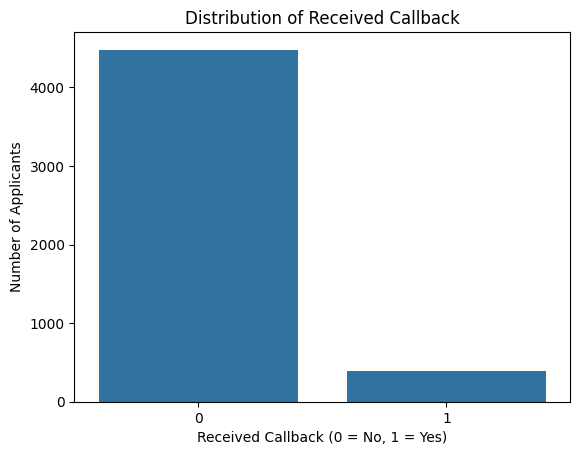

Callback distribution (%):
received_callback
0    91.95
1     8.05
Name: count, dtype: float64


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Counting values
callback_counts = df['received_callback'].value_counts().sort_index()

# Ploting the graph
sns.barplot(x=callback_counts.index, y=callback_counts.values)
plt.title('Distribution of Received Callback')
plt.xlabel('Received Callback (0 = No, 1 = Yes)')
plt.ylabel('Number of Applicants')
plt.xticks([0, 1])
plt.show()

# Print percentage of each class
percentage = (callback_counts / df.shape[0]) * 100
print("Callback distribution (%):")
print(percentage.round(2))


- 91.95% of applicants did not receive a callback.

- Only about 8.05% received one.

- The dataset is highly imbalanced in favor of "no callback".

K-Means is unsupervised, so it doesn’t “see” the target column at all , so the imbalance is not affecting my model


In [16]:
df['college_degree'].value_counts()
# shows the number of applicants who do or do not have college degree

college_degree
1    3504
0    1366
Name: count, dtype: int64

<Axes: >

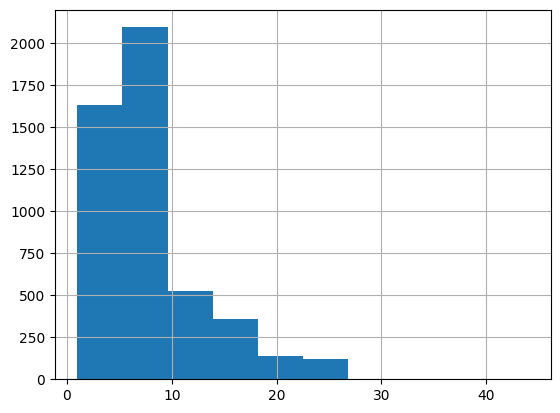

In [17]:
df['years_experience'].hist()

In [18]:
df['resume_quality'].value_counts()
# shows that the data has an equal amount of high/low quality resume

resume_quality
high    2446
low     2424
Name: count, dtype: int64

In [19]:
df[['military', 'volunteer', 'honors']].sum()
# shows how many applicants reported military service, volunteer work, or honors

military      473
volunteer    2004
honors        257
dtype: int64

In [20]:
df[['job_req_computer', 'job_req_communication', 'job_req_organization']].sum()

job_req_computer         2129
job_req_communication     608
job_req_organization      354
dtype: int64

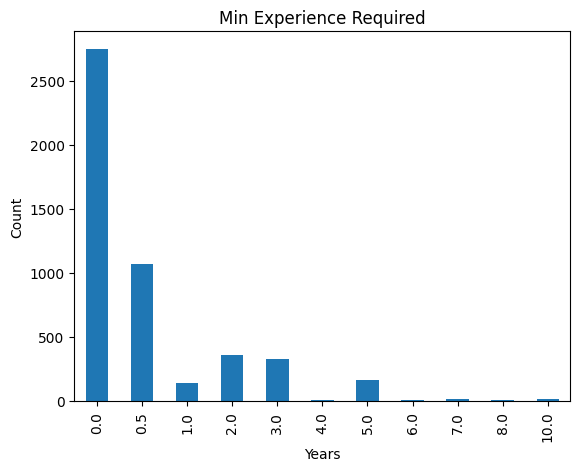

In [21]:
df['job_req_min_experience'].value_counts().sort_index().plot(kind='bar')
plt.title('Min Experience Required')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

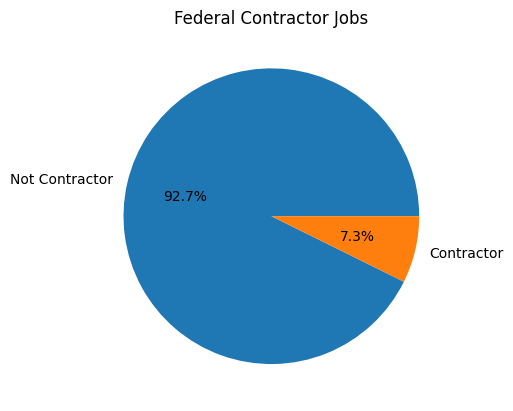

In [22]:
df['job_fed_contractor'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Contractor', 'Contractor'])
plt.title('Federal Contractor Jobs')
plt.ylabel('')
plt.show()

In [23]:
pd.crosstab(df['college_degree'], df['received_callback'])

received_callback,0,1
college_degree,,
0,1251,115
1,3227,277


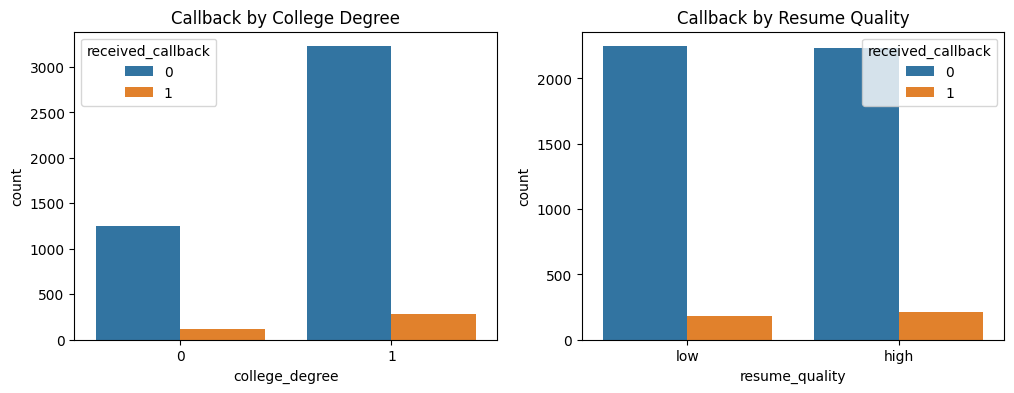

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='college_degree', hue='received_callback')
plt.title('Callback by College Degree')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='resume_quality', hue='received_callback')
plt.title('Callback by Resume Quality')


plt.show()


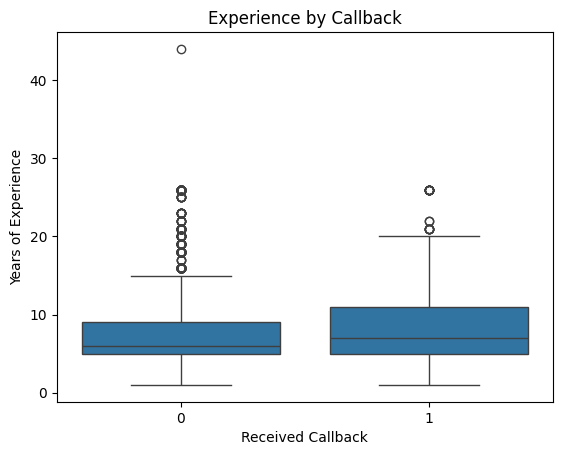

In [25]:
sns.boxplot(data=df, x='received_callback', y='years_experience')
plt.title('Experience by Callback')
plt.xlabel('Received Callback')
plt.ylabel('Years of Experience')
plt.show()

In [26]:
df.groupby('job_fed_contractor')[['job_req_min_experience', 'job_req_education']].mean()


,job_req_min_experience,job_req_education
job_fed_contractor,,
0.0,0.726628,0.100133
1.0,0.960674,0.191011


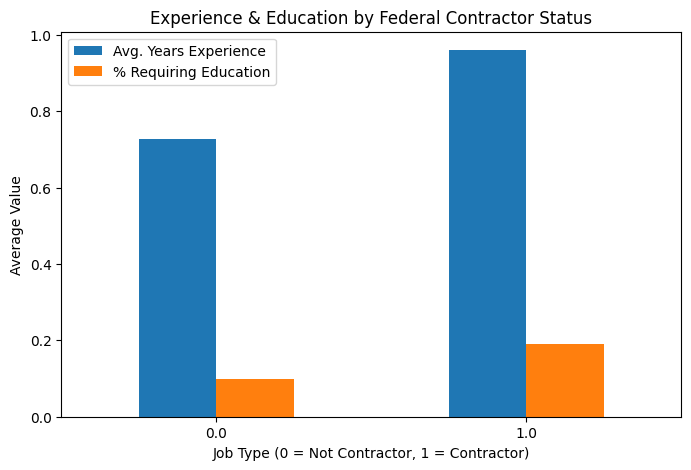

In [27]:

grouped = df.groupby('job_fed_contractor')[['job_req_min_experience', 'job_req_education']].mean()

# Plot
grouped.plot(kind='bar', figsize=(8, 5))
plt.title('Experience & Education by Federal Contractor Status')
plt.xlabel('Job Type (0 = Not Contractor, 1 = Contractor)')
plt.ylabel('Average Value')
plt.legend(['Avg. Years Experience', '% Requiring Education'])
plt.xticks(rotation=0)

plt.show()


When comparing job listings by whether they are with a federal contractor or not, we observe the following:

- Jobs with federal contractors require an average of 0.96 years experience.

- non-contractor jobs require slightly less — an average of 0.73 years.

This indicates that contractor positions typically expect more experienced applicants.

 - Additionally, 19% of federal contractor jobs explicitly require educational qualifications, while only 10% of non-contractor jobs do.

Conclusion:

Federal contractor jobs tend to be more demanding in both experience and education, reflecting stricter or more formal hiring standards.



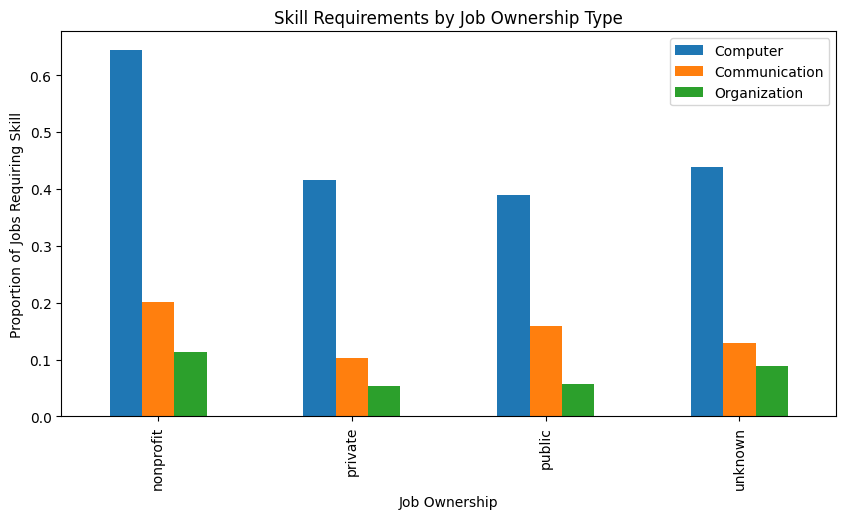

In [28]:

# Calculating average skill requirements per ownership type
skill_means = df.groupby('job_ownership')[['job_req_computer', 'job_req_communication', 'job_req_organization']].mean()

# Plot
skill_means.plot(kind='bar', figsize=(10, 5))
plt.title('Skill Requirements by Job Ownership Type')
plt.xlabel('Job Ownership')
plt.ylabel('Proportion of Jobs Requiring Skill')
plt.legend(['Computer', 'Communication', 'Organization'])
plt.show()


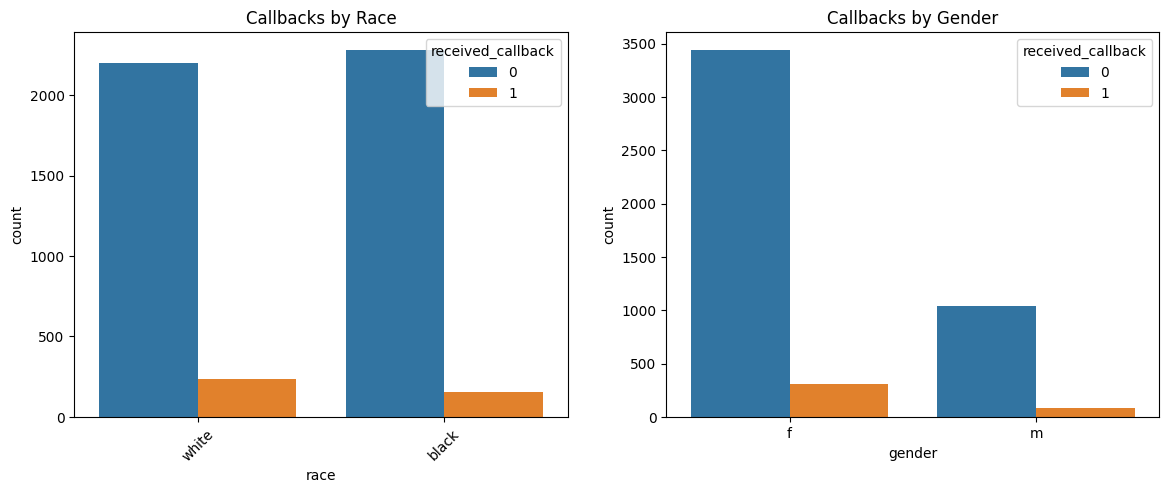

In [29]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='race', hue='received_callback')
plt.title('Callbacks by Race')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='gender', hue='received_callback')
plt.title('Callbacks by Gender')


plt.show()


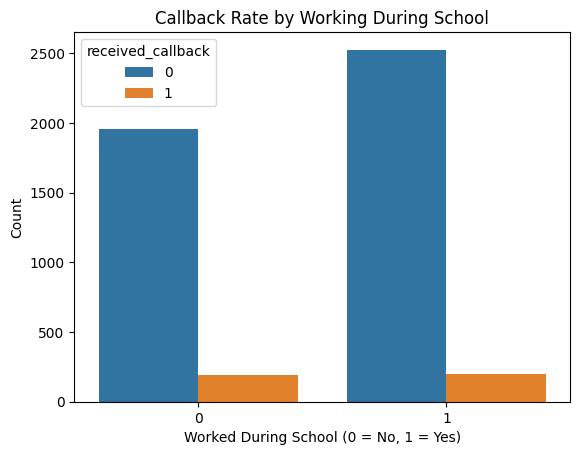

In [30]:
# Crosstab (optional summary)
pd.crosstab(df['worked_during_school'], df['received_callback'])

# Visual
sns.countplot(data=df, x='worked_during_school', hue='received_callback')
plt.title('Callback Rate by Working During School')
plt.xlabel('Worked During School (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


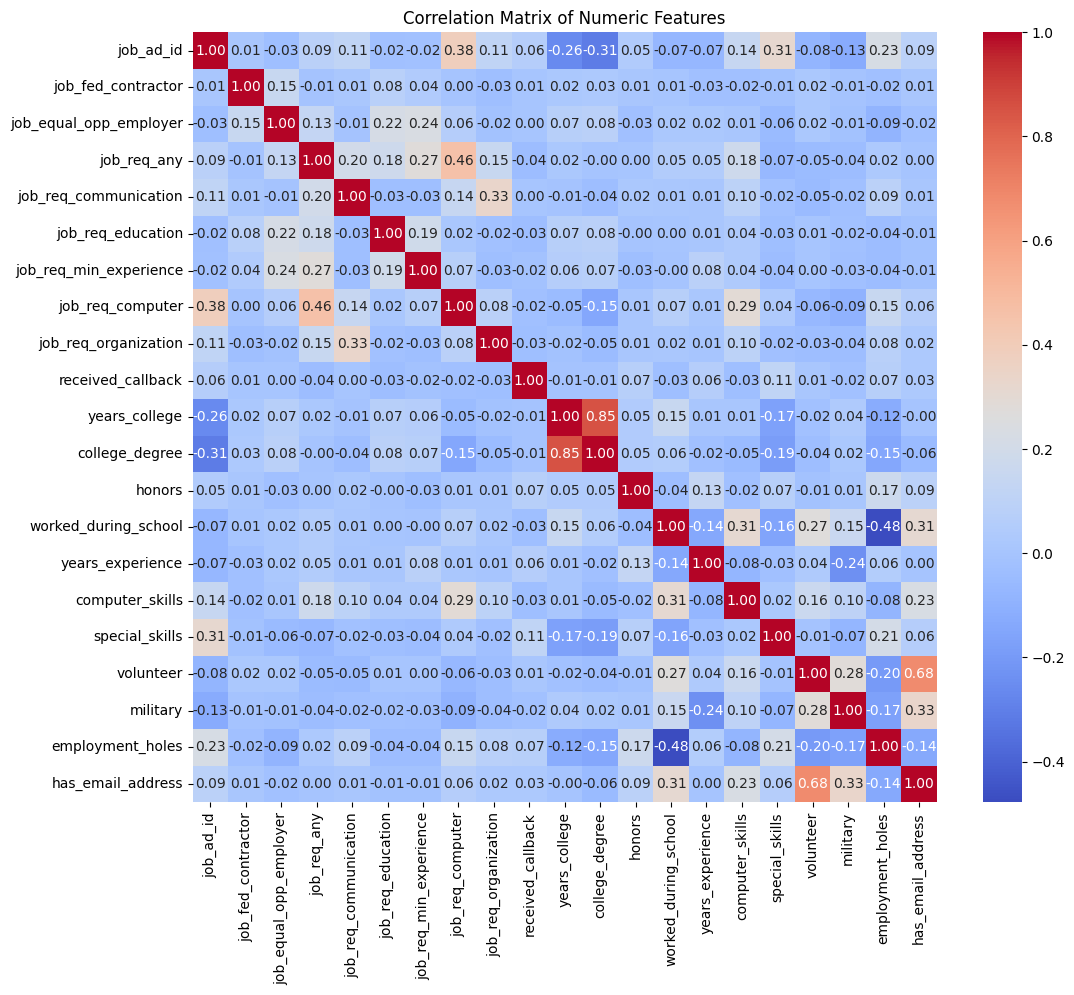

In [31]:
# Compute correlation matrix (numeric only)
corr_matrix = df.corr(numeric_only=True)

# Visualize top correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [32]:
# Find pairs with high correlation (above 0.8 or below -0.8)
high_corr = corr_matrix[(corr_matrix > 0.8) & (corr_matrix < 1.0)]
high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)


,years_college,college_degree
years_college,NaN,0.8547
college_degree,0.8547,NaN


In [33]:
# Sort correlations with target variable
corr_matrix['received_callback'].sort_values(ascending=False)


received_callback         1.000000
special_skills            0.111074
honors                    0.071951
employment_holes          0.071888
job_ad_id                 0.063178
years_experience          0.061436
has_email_address         0.025880
volunteer                 0.007197
job_fed_contractor        0.006798
job_equal_opp_employer    0.003092
job_req_communication     0.002421
years_college            -0.005748
college_degree           -0.008479
job_req_min_experience   -0.016120
military                 -0.020577
job_req_computer         -0.024907
worked_during_school     -0.027888
computer_skills          -0.028813
job_req_organization     -0.033416
job_req_education        -0.033864
job_req_any              -0.041699
Name: received_callback, dtype: float64

## Target Variable Encoding and Distribution Analysis

Converting the 'resume_quality' column into numeric values where 'low' becomes 0 and 'high' becomes 1. This helps in using the column for machine learning models which require numeric input.

In [34]:
df1 = df.copy()
df1['resume_quality'] = df1['resume_quality'].map({'low': 0, 'high': 1})

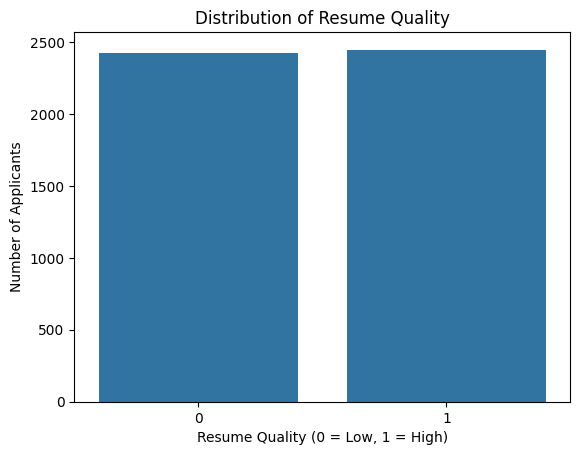

Resume Quality distribution (%):
resume_quality
0    49.77
1    50.23
Name: count, dtype: float64


In [35]:
# Count values in resume_quality
quality_counts = df1['resume_quality'].value_counts().sort_index()

# Plot the distribution
sns.barplot(x=quality_counts.index, y=quality_counts.values)
plt.title('Distribution of Resume Quality')
plt.xlabel('Resume Quality (0 = Low, 1 = High)')
plt.ylabel('Number of Applicants')
plt.xticks([0, 1])
plt.show()

# Print percentage distribution
quality_percent = (quality_counts / df1.shape[0]) * 100
print("Resume Quality distribution (%):")
print(quality_percent.round(2))

-In this machine learning model, resume_quality is chosen as the target variable as it represents the classification goal: predicting whether a candidate's resume is of low (0) or high (1) quality.
As shown in the bar plot, the distribution of classes is nearly equal (≈50% each), indicating that the dataset is already balanced. Therefore, SMOTE or any oversampling technique is not required for this target, ensuring model training is unbiased and naturally representative of both classes

## Selecting Input Features Based on Importance

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


# Encode categorical data
df_copy = df1.copy()
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        df_copy[col] = LabelEncoder().fit_transform(df_copy[col])

# Define features and target
X1 = df_copy.drop(columns=['resume_quality'])
y1 = df_copy['resume_quality']

# Train Random Forest
model = RandomForestClassifier()
model.fit(X1, y1)

# Show top 10 important features
importances = pd.Series(model.feature_importances_, index=X1.columns)
print(importances.sort_values(ascending=False).head(10))


has_email_address       0.452257
volunteer               0.304435
years_experience        0.048466
worked_during_school    0.032291
military                0.025153
job_ad_id               0.019266
years_college           0.015920
computer_skills         0.014323
employment_holes        0.013281
job_city                0.009941
dtype: float64


Creating a heatmap to visually show how important each feature is in predicting resume_quality using the trained Random Forest model.

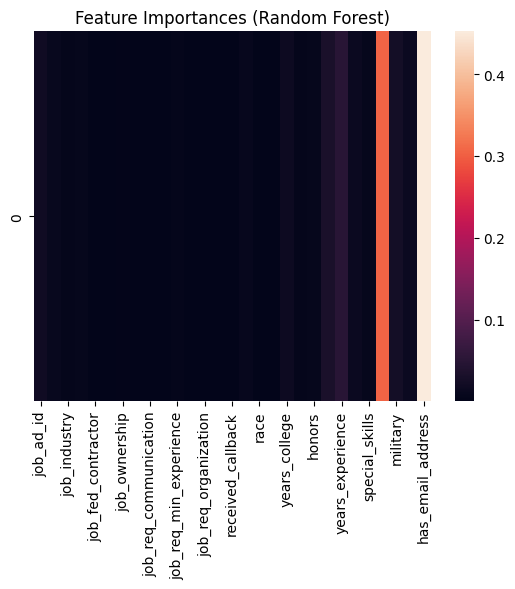

In [37]:
# Create a DataFrame with feature names and importances
importance_df = pd.DataFrame([model.feature_importances_], columns=X1.columns)
sns.heatmap(importance_df)
plt.title("Feature Importances (Random Forest)")
plt.show()

## Feature Significance Visualization for Resume Quality

To support the selection of the most influential features for predicting resume_quality, visualizations were created using bar plots for binary features and a box plot for the continuous feature (years_experience). These plots help understand how each feature contributes to distinguishing between low and high-quality

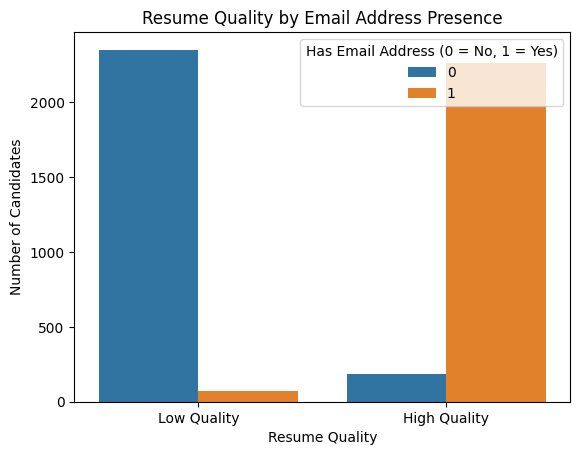

In [38]:
# Adding readable labels for resume qualit
df1['resume_quality_label'] = df1['resume_quality'].map({0: 'Low Quality', 1: 'High Quality'})

# Plot

sns.countplot(data=df1, x='resume_quality_label', hue='has_email_address')
plt.title('Resume Quality by Email Address Presence')
plt.xlabel('Resume Quality')
plt.ylabel('Number of Candidates')
plt.legend(title='Has Email Address (0 = No, 1 = Yes)')
plt.show()

1. **Has Email Address**-The above bar plots show a strong inverse relationship: when has_email_address = 1, the majority of resumes are High Quality; when has_email_address = 0, most are Low Quality. The clear separation in both cases makes this the most influential feature in distinguishing resume quality.



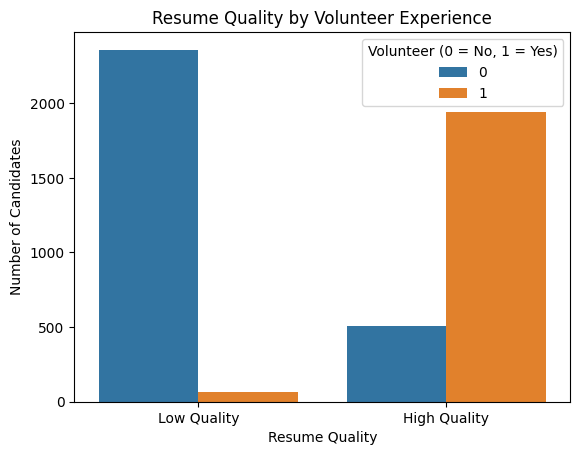

In [39]:
# Adding readable labels for resume quality
df1['resume_quality_label'] = df1['resume_quality'].map({0: 'Low Quality', 1: 'High Quality'})

# Plot

sns.countplot(data=df1, x='resume_quality_label', hue='volunteer')
plt.title('Resume Quality by Volunteer Experience')
plt.xlabel('Resume Quality')
plt.ylabel('Number of Candidates')
plt.legend(title='Volunteer (0 = No, 1 = Yes)')
plt.show()

2.**Volunteer**-When volunteer = 1, the count of High Quality resumes is significantly higher than Low Quality. In contrast, when volunteer = 0, Low Quality resumes dominate. The contrast is less extreme than the email feature but still distinct, making it the second most informative feature.

C:\Users\yash\AppData\Local\Temp\ipykernel_11632\2060299957.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(experience, showfliers=True, labels=['Low Quality', 'High Quality'])


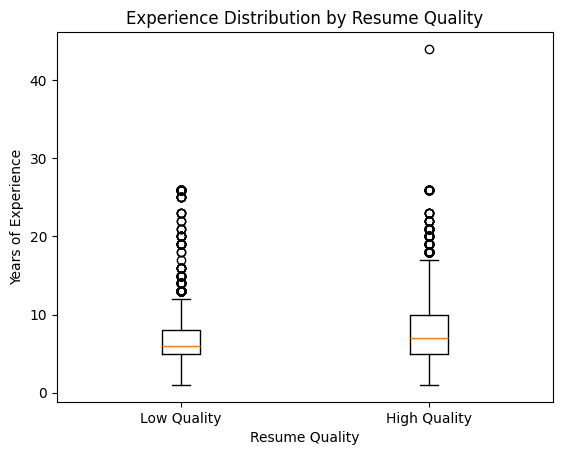

In [40]:
# Group years_experience by resume_quality
exp_low = df1[df1['resume_quality'] == 0]['years_experience']
exp_high = df1[df1['resume_quality'] == 1]['years_experience']

# Combine groups into a list
experience = [exp_low, exp_high]

# Plot
plt.boxplot(experience, showfliers=True, labels=['Low Quality', 'High Quality'])
plt.ylabel('Years of Experience')
plt.xlabel('Resume Quality')
plt.title('Experience Distribution by Resume Quality')
plt.show()


3.**Years of Experience**-The boxplot shows that High Quality resumes generally have higher median years of experience, along with a broader spread and more upper-range outliers. This difference between the distributions across quality levels makes it a useful numeric predictor, though overlap exists


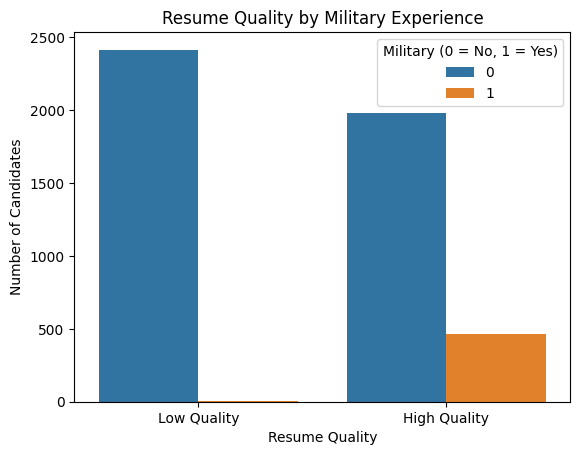

In [41]:
# Adding readable labels for resume quality
df1['resume_quality_label'] = df1['resume_quality'].map({0: 'Low Quality', 1: 'High Quality'})

# Plot

sns.countplot(data=df1, x='resume_quality_label', hue='military')
plt.title('Resume Quality by Military Experience')
plt.xlabel('Resume Quality')
plt.ylabel('Number of Candidates')
plt.legend(title='Military (0 = No, 1 = Yes)')
plt.show()


**4. Military-**
The graph shows that a larger number of candidates with military experience have high-quality resumes compared to those without. This suggests a positive correlation between military experience and resume quality, indicating it could be a useful feature in predicting strong result


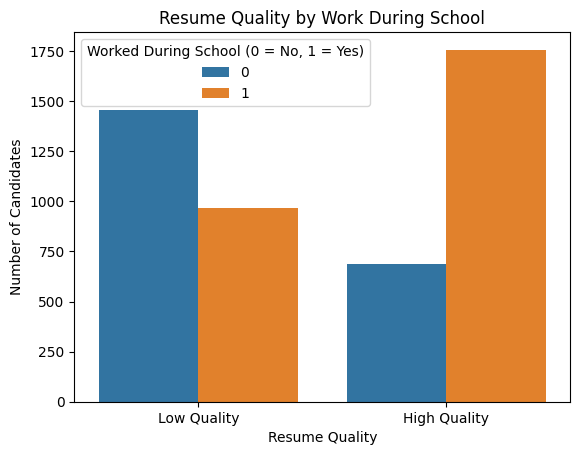

In [42]:
# Adding readable labels for resume quality
df1['resume_quality_label'] = df1['resume_quality'].map({0: 'Low Quality', 1: 'High Quality'})

# Plot resume quality based on whether candidate worked during school
sns.countplot(data=df1, x='resume_quality_label', hue='worked_during_school')
plt.title('Resume Quality by Work During School')
plt.xlabel('Resume Quality')
plt.ylabel('Number of Candidates')
plt.legend(title='Worked During School (0 = No, 1 = Yes)')
plt.show()


5. **Worked During School**-When worked_during_school = 1, High Quality resumes are slightly more than Low Quality; for worked_during_school = 0, the reverse is true. The difference is present but smaller in magnitude compared to other features, making it the least strong among the top five but still a valid discriminator.

## Data Preparation and Preprocessing

Importing essential tools for splitting data, standardizing features, and applying the K-Nearest Neighbors classification model.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


Selecting input features and target variable, and checking class distribution for model training

In [44]:
print(df1['resume_quality'].value_counts())
x1_values = df1[['has_email_address', 'volunteer','worked_during_school','military','years_experience']]
y1_values = df1['resume_quality']


resume_quality
1    2446
0    2424
Name: count, dtype: int64


Breaking the data into two parts: one for training the model and one for testing it, keeping 25% of the data for testing.

In [45]:
x1_train, x1_test, y1_train, y1_test = train_test_split( x1_values, y1_values, test_size=0.25, random_state=10)


Scaling the training and testing data so that all the feature values have a similar range

In [46]:
scaler1 = StandardScaler()
x1_train_scale = scaler1.fit_transform(x1_train)
x1_test_scale = scaler1.transform(x1_test)

## KNN Model Training and Tuning

Testing different values of neighbors (1 to 19) for a KNN model, recording the accuracy for each, and storing the results in a list.

In [47]:
# Create an empty list to store the accuracy and number of neighbours for each KNN model
accuracy1 = []
num_neigh = []

# Use ii to cycle through values 1 to 15. This will be the number of neighbours for the KNN classifier.
for ii in range(1,20):
    # Set number of neighbours to ii
    KNN = KNeighborsClassifier(n_neighbors=ii)
    # Training or fitting the model with the data
    KNN.fit(x1_train_scale,y1_train)
    # .score provides the accuracy of the model based on the testing data. Store the accuracy into the list.
    accuracy1.append(KNN.score(x1_test_scale,y1_test))
    # Append the number of neighbours to a list
    num_neigh.append(ii)

print(accuracy1)

[0.9827586206896551, 0.9811165845648604, 0.9827586206896551, 0.9819376026272578, 0.9819376026272578, 0.9761904761904762, 0.9753694581280788, 0.9753694581280788, 0.9753694581280788, 0.9753694581280788, 0.9745484400656814, 0.9745484400656814, 0.9745484400656814, 0.9745484400656814, 0.9745484400656814, 0.9737274220032841, 0.9737274220032841, 0.9737274220032841, 0.9745484400656814]


Drawing a scatter plot to show how the accuracy of the KNN model changes with different numbers of neighbors.

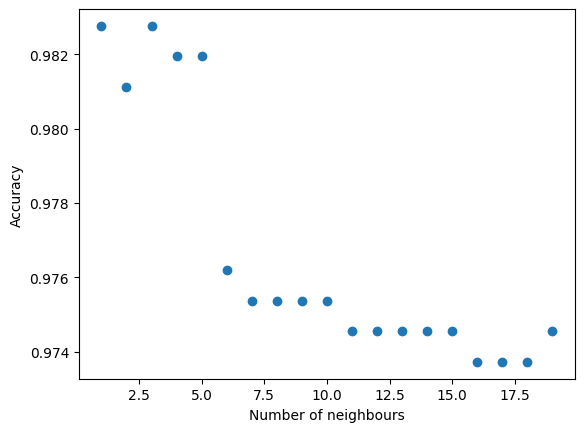

In [48]:
plt.scatter(num_neigh,accuracy1)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show();

Creating a KNN model with 5 neighbors and training it using the scaled training data.

In [49]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN = KNN.fit(x1_train_scale,y1_train)

## Final Evaluation of KNN Model

Using the trained KNN model to make predictions on the test data and then checking the data type of the predictions.

In [50]:
y1_predict = KNN.predict(x1_test_scale)

print(y1_predict.dtype)

int64


Creating a confusion matrix to compare the actual test labels (y_test) with the predicted labels (y_predict) and see how well the model classified each category.

In [51]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y1_test, y1_predict))

[[590  11]
 [ 11 606]]


Printing Precision, Recall, F1-score, and Support

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_predict))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       601
           1       0.98      0.98      0.98       617

    accuracy                           0.98      1218
   macro avg       0.98      0.98      0.98      1218
weighted avg       0.98      0.98      0.98      1218



Creating a table comparing actual and predicted values and visualizing it with a heatmap.

<Axes: xlabel='Predicted', ylabel='Actual'>

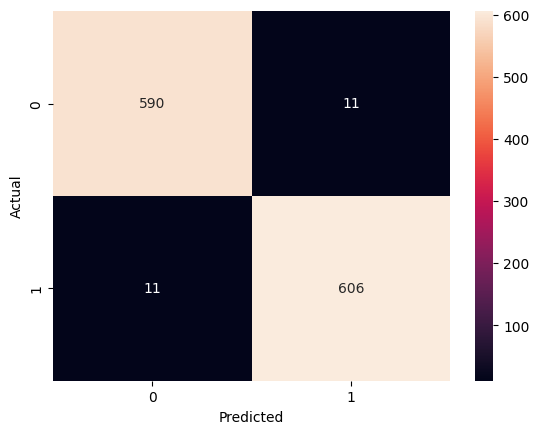

In [53]:
# Creating new dataframe
re = pd.DataFrame()

# Creating new columns within dataframe
re['Actual'] = y1_test
re['Predicted'] = y1_predict

# Using pd.crosstab to count the frequency of the classes in actual and predicted
freq = pd.crosstab(re.Actual,re.Predicted)

# Using sns.heatmap to plot the heatmap
sns.heatmap(freq,annot=True,fmt="d")

In [54]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [55]:

X2 = df[['years_experience']]  # Keep it simple: one feature for visualization
y2 = df['received_callback']   # Binary target: 0 or 1

In [56]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [57]:
model2 = LogisticRegression()
model2.fit(X2_train, y2_train)

LogisticRegression()

c:\Users\yash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


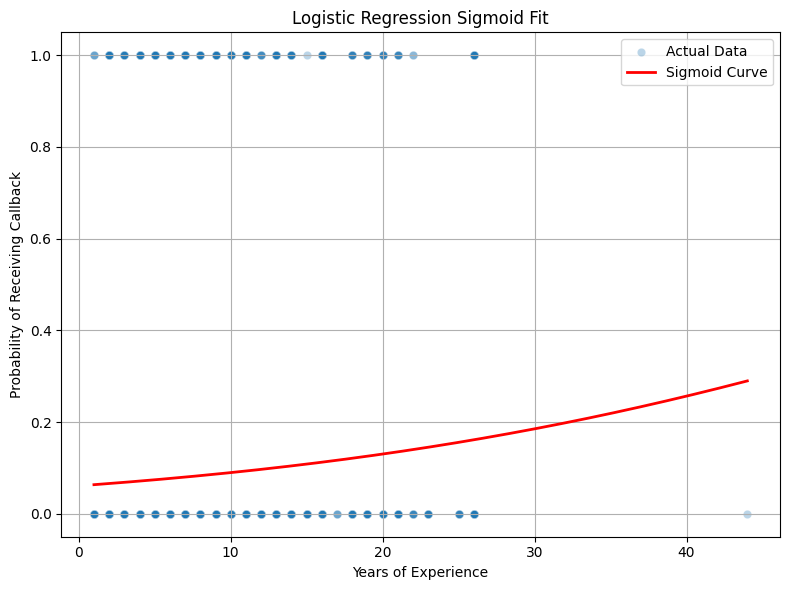

In [58]:
y_probs = model2.predict_proba(X2_test)[:, 1]  # Probabilities of class 1
# Generate a smooth curve across experience values
x_vals = np.linspace(X2.min().values[0], X2.max().values[0], 300).reshape(-1, 1)
y_sigmoid = model2.predict_proba(x_vals)[:, 1]

# Plot actual data and sigmoid curve
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X2['years_experience'], y=y2, alpha=0.3, label="Actual Data")
plt.plot(x_vals, y_sigmoid, color='red', linewidth=2, label="Sigmoid Curve")
plt.xlabel("Years of Experience")
plt.ylabel("Probability of Receiving Callback")
plt.title("Logistic Regression Sigmoid Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
print(f"Accuracy: {accuracy_score(y2_test, model2.predict(X2_test))}")
print(f"AUC: {roc_auc_score(y2_test, y_probs)}")

Accuracy: 0.9342915811088296
AUC: 0.5295501373626373


Accuracy: 0.9342915811088296
AUC: 0.5925824175824176


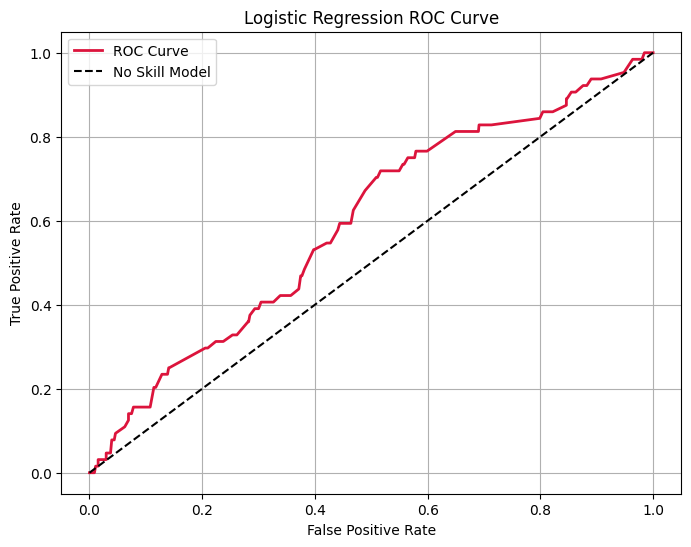

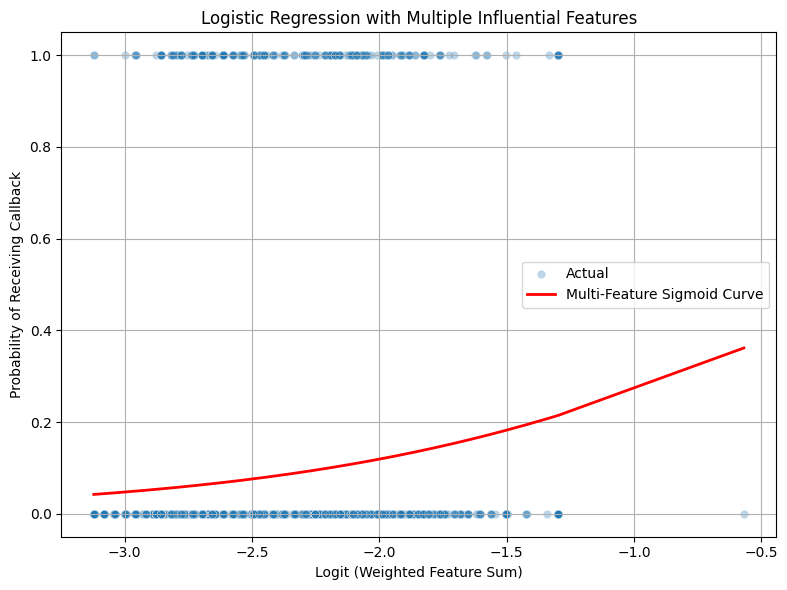

In [60]:
# Select influential features
features2 = ['years_experience', 'computer_skills', 'college_degree',
            'employment_holes', 'worked_during_school']
X2 = df[features2]
y2 = df['received_callback']

# Scale features for better logistic behavior
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# Split into training and testing
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)

# Train logistic regression model
log_model = LogisticRegression()
log_model.fit(X2_train, y2_train)

# Get linear combination for sigmoid input: this is the 'logit' part
logit_vals = log_model.decision_function(X2_train)  # Same shape as y_train

# Apply sigmoid function manually
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

y_sigmoid = sigmoid(logit_vals)

# Predict probabilities
y_prob = log_model.predict_proba(X2_test)[:, 1]

print(f"Accuracy: {accuracy_score(y2_test, log_model.predict(X2_test))}")
print(f"AUC: {roc_auc_score(y2_test, y_prob)}")

from sklearn.metrics import roc_curve
# ROC curve to visualize performance
fpr, tpr, thresholds = roc_curve(y2_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='crimson', linewidth=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="No Skill Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Plot sigmoid curve against logit values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=logit_vals, y=y2_train, alpha=0.3, label="Actual")
plt.plot(np.sort(logit_vals), np.sort(y_sigmoid), color='red', label="Multi-Feature Sigmoid Curve", linewidth=2)
plt.xlabel("Logit (Weighted Feature Sum)")
plt.ylabel("Probability of Receiving Callback")
plt.title("Logistic Regression with Multiple Influential Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Now, considering balanced dataset , we try to visualize the dataset with the help of confusion matrix.**

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE
smote = SMOTE(random_state=42)
X2_train_resampled, y2_train_resampled = smote.fit_resample(X2_train, y2_train)

# Train logistic regression model
model2 = LogisticRegression(solver='liblinear')  # 'liblinear' works well for small datasets
model2.fit(X2_train_resampled, y2_train_resampled)

# Predict on original test set (not resampled)
y2_pred = model2.predict(X2_test)

# Evaluate performance
print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

[[499 411]
 [ 28  36]]
              precision    recall  f1-score   support

           0       0.95      0.55      0.69       910
           1       0.08      0.56      0.14        64

    accuracy                           0.55       974
   macro avg       0.51      0.56      0.42       974
weighted avg       0.89      0.55      0.66       974



The model shows high precision for class 0 but struggles significantly with class 1, yielding very low precision and F1-score. Despite an overall accuracy of 55%, the performance on the minority class (1) is poor, indicating a likely class imbalance and the need for better handling of minority class predictions.

To conclude,

The ROC curves show why it's useful to check how well a model performs at different cutoff points. The red curve gives more detailed information and shows the model is better at telling apart people who got callbacks from those who didn’t—unlike the yellow curve, which looks less complete.

Also, it reveals how combining several influential resume traits—like experience, education, technical skills, and employment gaps—results in a much clearer probability transition. It shows that logistic regression thrives when multiple signals are aligned, and visualizing the combined effect through the model’s linear predictor offers deeper insight into how resumes are interpreted . Together, the ROC curves and sigmoid plots underscore how thoughtful modeling transforms raw resume data into meaningful predictions.

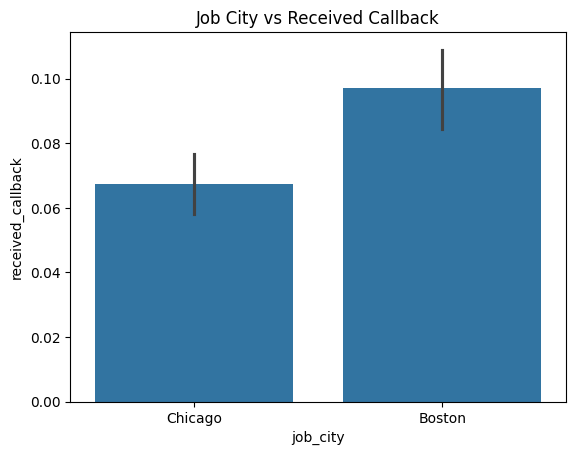

In [62]:
sns.barplot(x = 'job_city', y = 'received_callback', data = df)
plt.title('Job City vs Received Callback')
plt.show()

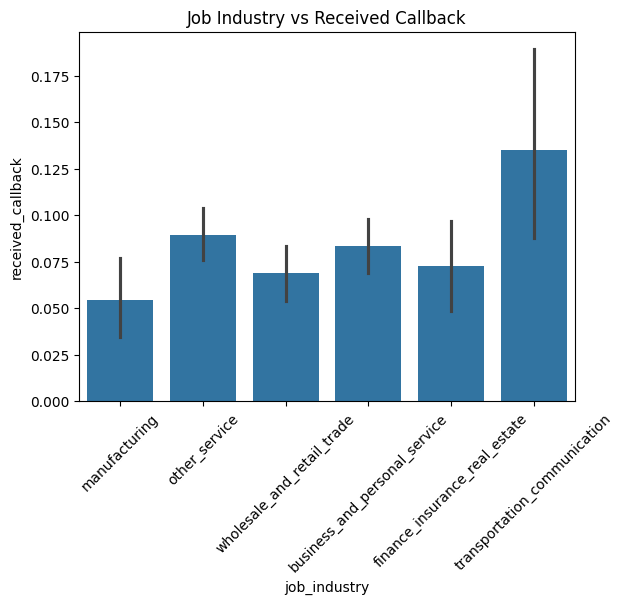

In [63]:
sns.barplot(x = 'job_industry', y = 'received_callback', data = df)
plt.title('Job Industry vs Received Callback')
plt.xticks(rotation=45)
plt.show()

This barplot shows that the transportation/communication industry has the highest average callback rate whereas the manufacturing industry has the lowest average callback rate.

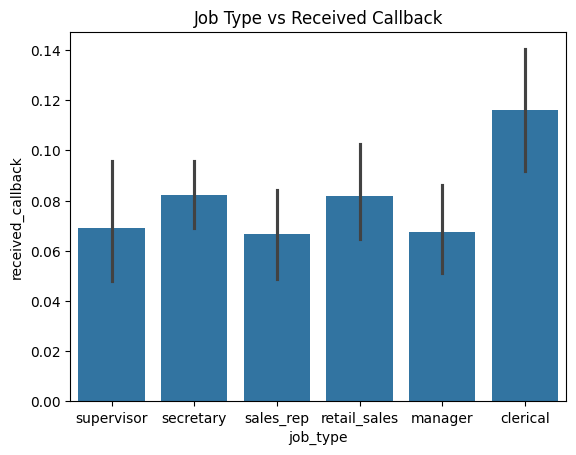

In [64]:
sns.barplot(x = 'job_type', y = 'received_callback', data = df)
plt.title('Job Type vs Received Callback')
plt.show()

The above barplot shows that the 'clerical' job role has the highest average callback rate, followed by 'secretary' and 'retail/sales'. Whereas 'supervisor', 'sates rep' and 'manager' have nearly same average callback rates.

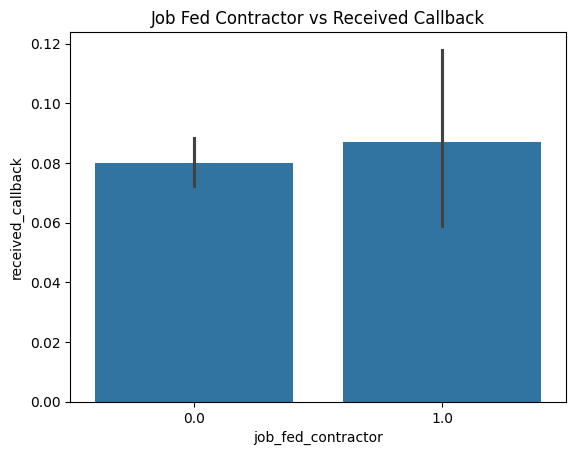

In [65]:
sns.barplot(x = 'job_fed_contractor', y = 'received_callback', data = df)
plt.title('Job Fed Contractor vs Received Callback')
plt.show()

From the above barplot we can say that the employer being a federal contractor does not have any significant impact on whether the applicant received a callback or not as the average callback rate is nearly same for both the cases.

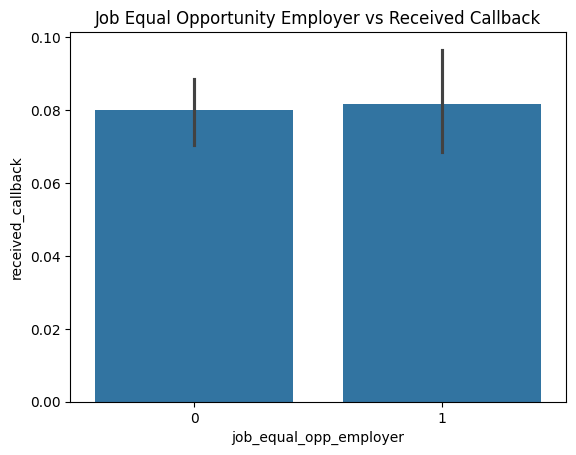

In [66]:
sns.barplot(x = 'job_equal_opp_employer', y = 'received_callback', data = df)
plt.title('Job Equal Opportunity Employer vs Received Callback')
plt.show()

The barplot shows that whether the employer is an equal opportunity employer or not the average callback rate is almost same.

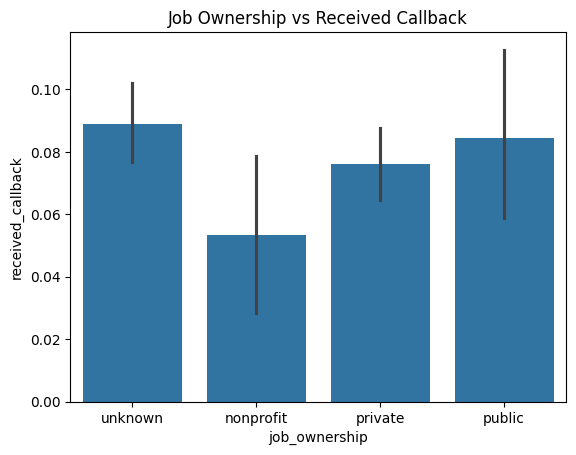

In [67]:
sns.barplot(x = 'job_ownership', y = 'received_callback', data = df)
plt.title('Job Ownership vs Received Callback')
plt.show()

Jobs posted by nonprofit organizations have the lowest callback rate, while public and unknown ownership types show higher callback rates.

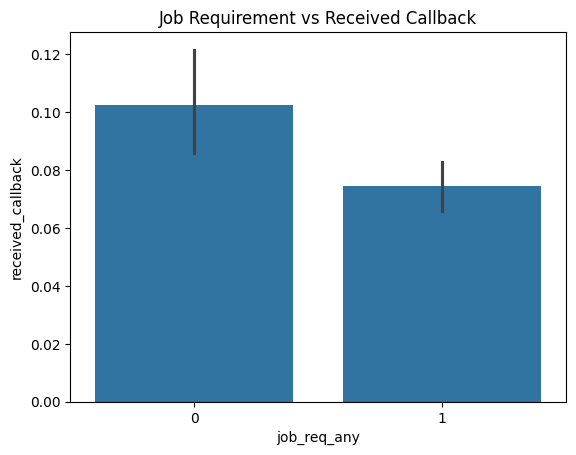

In [68]:
sns.barplot(x = 'job_req_any', y = 'received_callback', data = df)
plt.title('Job Requirement vs Received Callback')
plt.show()

Jobs with no specific requirements received more callbacks than those that had specific requirements.  

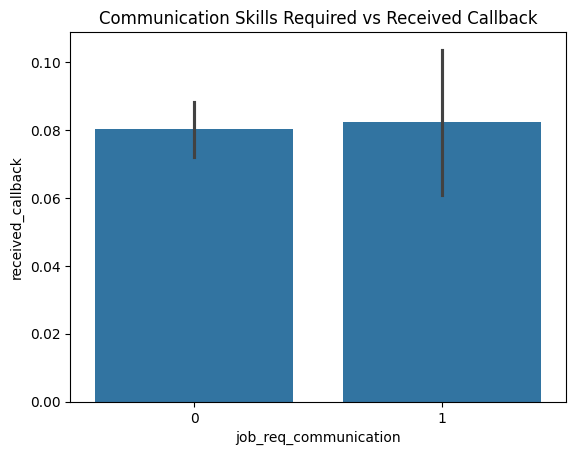

In [69]:
sns.barplot(x = 'job_req_communication', y = 'received_callback', data = df)
plt.title('Communication Skills Required vs Received Callback')
plt.show()

The average received callback rate is not impacted by communication skills requirements.

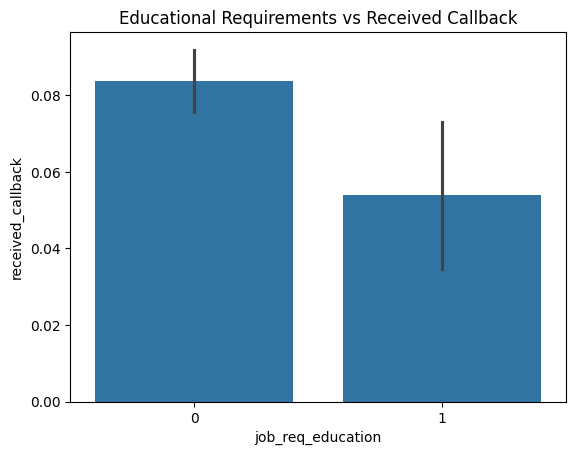

In [70]:
sns.barplot(x = 'job_req_education', y = 'received_callback', data = df)
plt.title('Educational Requirements vs Received Callback')
plt.show()

Jobs with no specific educational requirements received more callbacks than those that had specific requirements.  

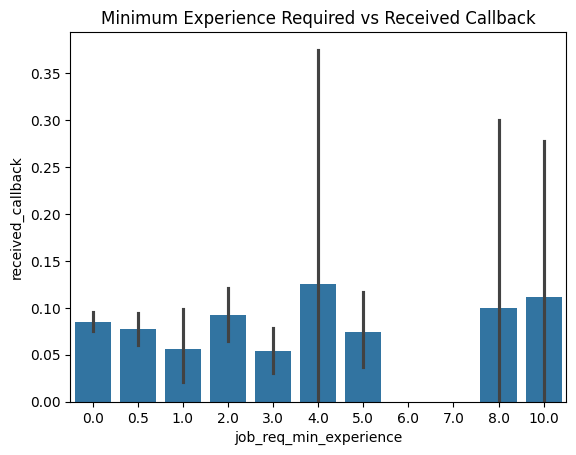

In [71]:
sns.barplot(x = 'job_req_min_experience', y = 'received_callback', data = df)
plt.title('Minimum Experience Required vs Received Callback')
plt.show()

From the above plot, we can say that jobs requiring an experience level of 4 have highest average callback rate.

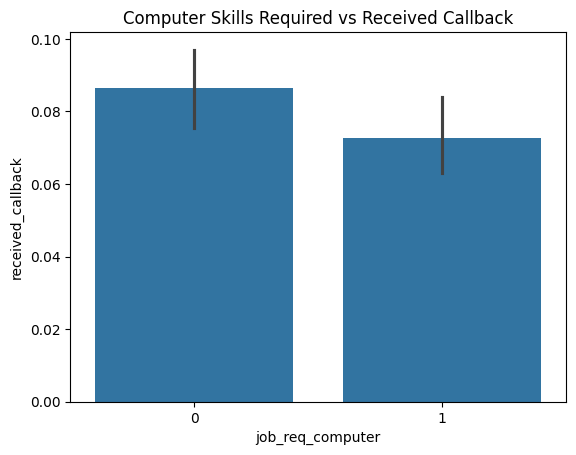

In [72]:
sns.barplot(x = 'job_req_computer', y = 'received_callback', data = df)
plt.title('Computer Skills Required vs Received Callback')
plt.show()

The jobs having no computer related skill requirements have a higher average callback rate.

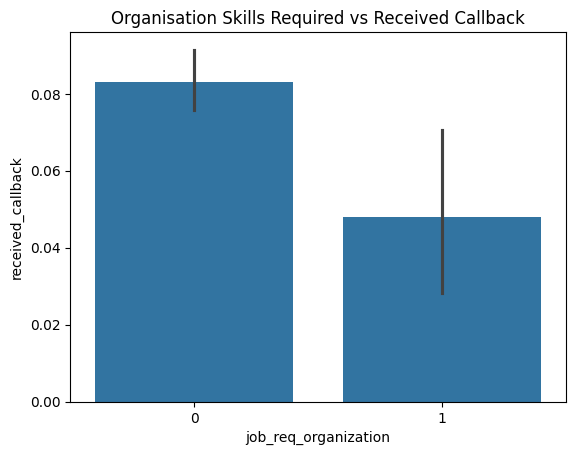

In [73]:
sns.barplot(x = 'job_req_organization', y = 'received_callback', data = df)
plt.title('Organisation Skills Required vs Received Callback')
plt.show()


The jobs having no organisation skill requirements have a higher average callback rate.

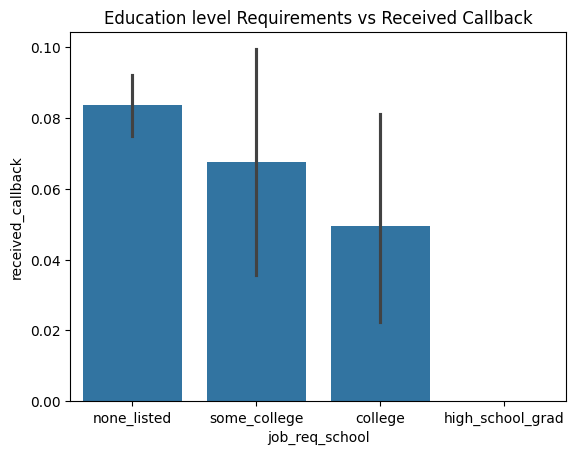

In [74]:
sns.barplot(x = 'job_req_school', y = 'received_callback', data = df)
plt.title('Education level Requirements vs Received Callback')
plt.show()

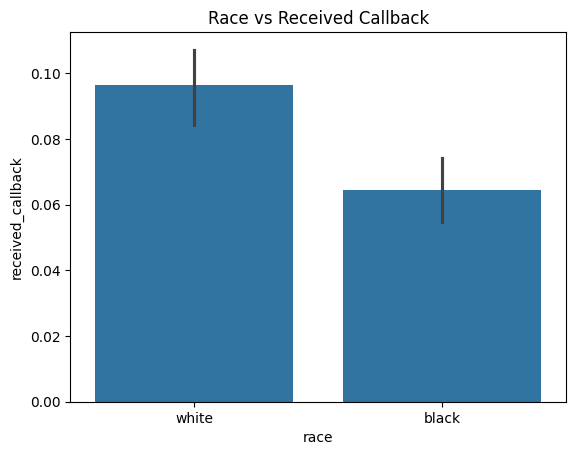

In [75]:
sns.barplot(x = 'race', y = 'received_callback', data = df)
plt.title('Race vs Received Callback')
plt.show()

The above barplot shows that white applicants have a higher average callback rate than the black applicants.

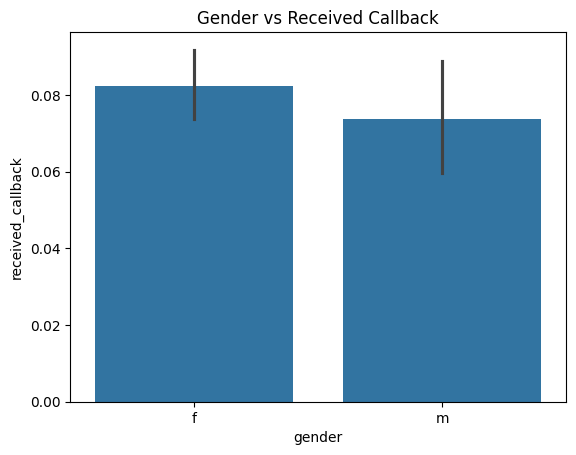

In [76]:
sns.barplot(x = 'gender', y = 'received_callback', data = df)
plt.title('Gender vs Received Callback')
plt.show()

The barplot shows that females have a higher average callback rate as compared to males.

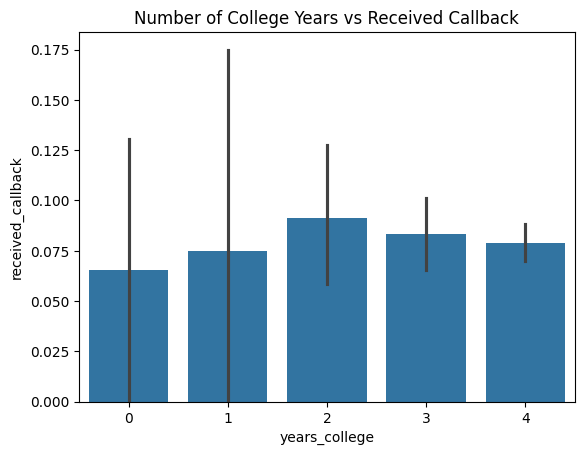

In [77]:
sns.barplot(x = 'years_college', y = 'received_callback', data = df)
plt.title('Number of College Years vs Received Callback')
plt.show()

The barplot shows that the applicants who have done 2 years of college have the highest average callback rate.

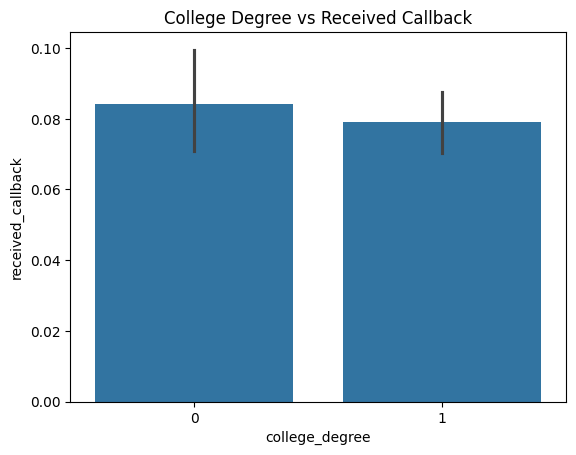

In [78]:
sns.barplot(x = 'college_degree', y = 'received_callback', data = df)
plt.title('College Degree vs Received Callback')
plt.show()

The applicants not having a college degree have a slightly higher average callback rate.

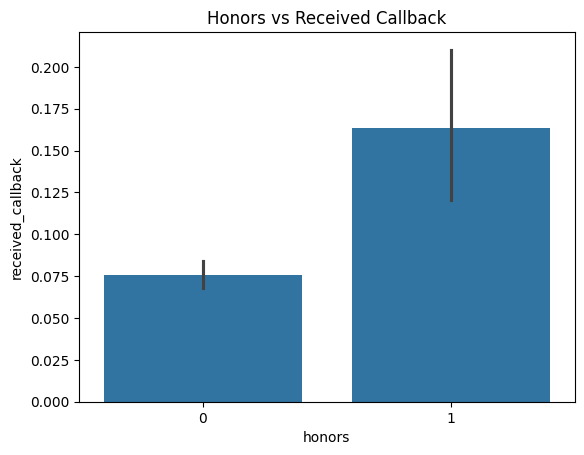

In [79]:
sns.barplot(x = 'honors', y = 'received_callback', data = df)
plt.title('Honors vs Received Callback')
plt.show()

This shows that applicants having an honors have a higher average callback rate.


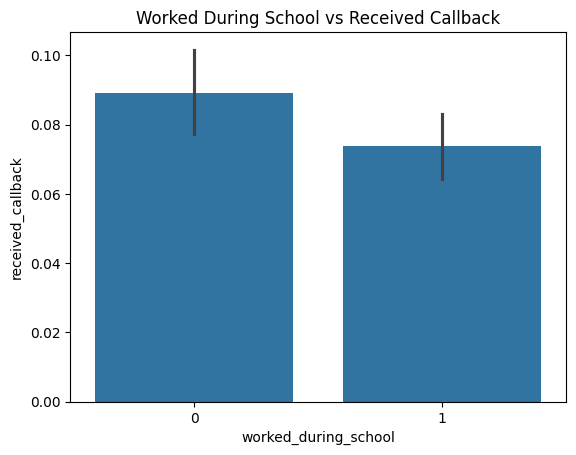

In [80]:
sns.barplot(x = 'worked_during_school', y = 'received_callback', data = df)
plt.title('Worked During School vs Received Callback')
plt.show()

The applicants who didn't work during school have a higher average callback rate.

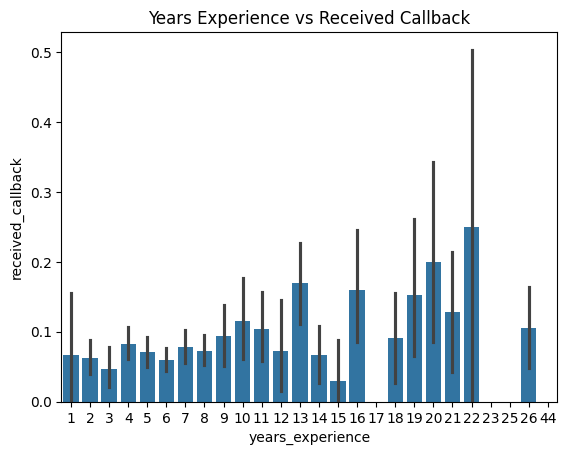

In [81]:
sns.barplot(x = 'years_experience', y = 'received_callback', data = df)
plt.title('Years Experience vs Received Callback')
plt.show()

The applicants having 22 years of experience have the highest average callback rate.

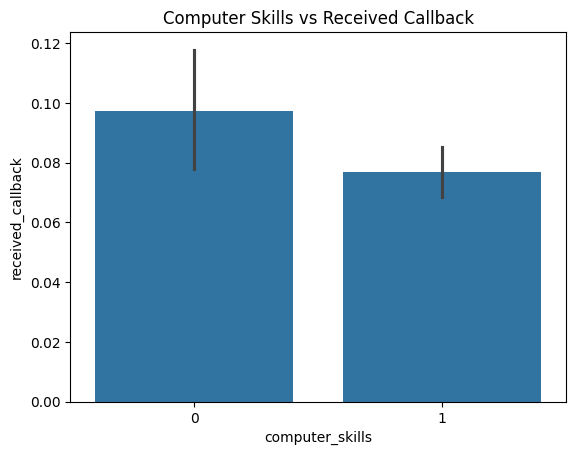

In [82]:
sns.barplot(x = 'computer_skills', y = 'received_callback', data = df)
plt.title('Computer Skills vs Received Callback')
plt.show()

The barplot shows that the applicants having no computer skills have a higher average callback rate.

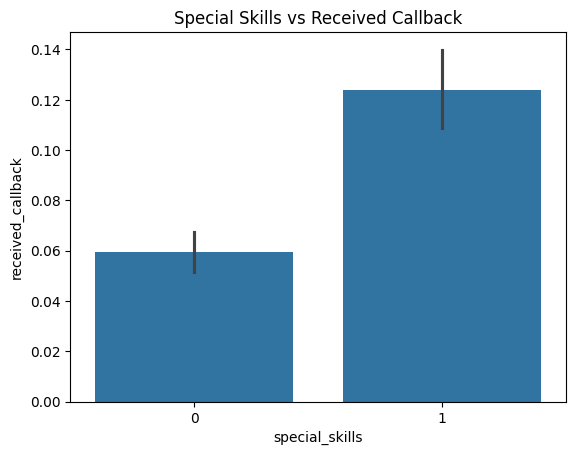

In [83]:
sns.barplot(x = 'special_skills', y = 'received_callback', data = df)
plt.title('Special Skills vs Received Callback')
plt.show()

The barplot shows that the applicants having special skills have a higher average callback rate.

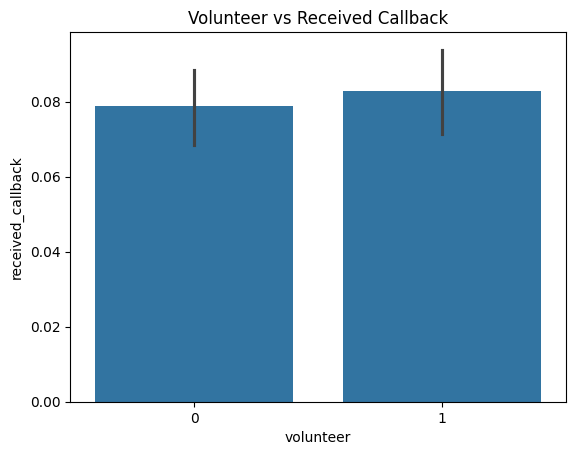

In [84]:
sns.barplot(x = 'volunteer', y = 'received_callback', data = df)
plt.title('Volunteer vs Received Callback')
plt.show()

This shows that whether the applicant is a volunteer or not barely has any impact on whether the applicant received a callback or not.

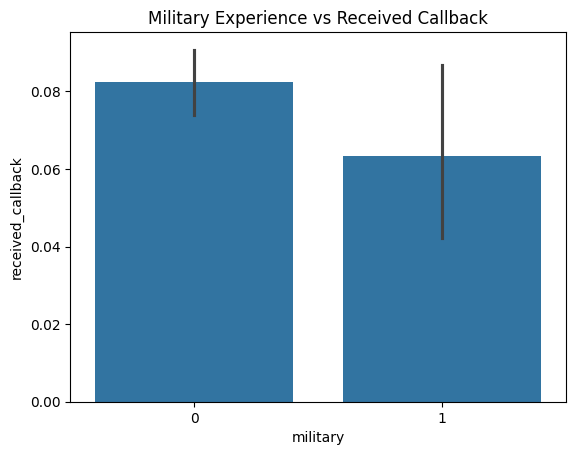

In [85]:
sns.barplot(x = 'military', y = 'received_callback', data = df)
plt.title('Military Experience vs Received Callback')
plt.show()

The barplot shows that the applicants having no military experience have a higher average callback rate.

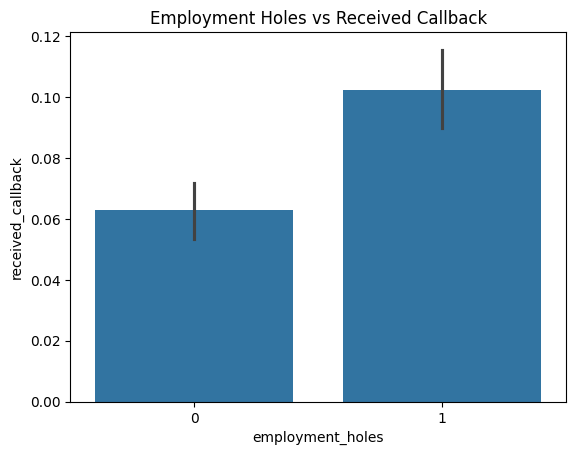

In [86]:
sns.barplot(x = 'employment_holes', y = 'received_callback', data = df)
plt.title('Employment Holes vs Received Callback')
plt.show()

The barplot shows that the applicants having employment holes have a higher average callback rate.

Pearson's Correlation: 
received_callback         1.000000
special_skills            0.111074
honors                    0.071951
employment_holes          0.071888
job_ad_id                 0.063178
years_experience          0.061436
has_email_address         0.025880
volunteer                 0.007197
job_fed_contractor        0.006798
job_equal_opp_employer    0.003092
job_req_communication     0.002421
years_college            -0.005748
college_degree           -0.008479
job_req_min_experience   -0.016120
military                 -0.020577
job_req_computer         -0.024907
worked_during_school     -0.027888
computer_skills          -0.028813
job_req_organization     -0.033416
job_req_education        -0.033864
job_req_any              -0.041699
Name: received_callback, dtype: float64


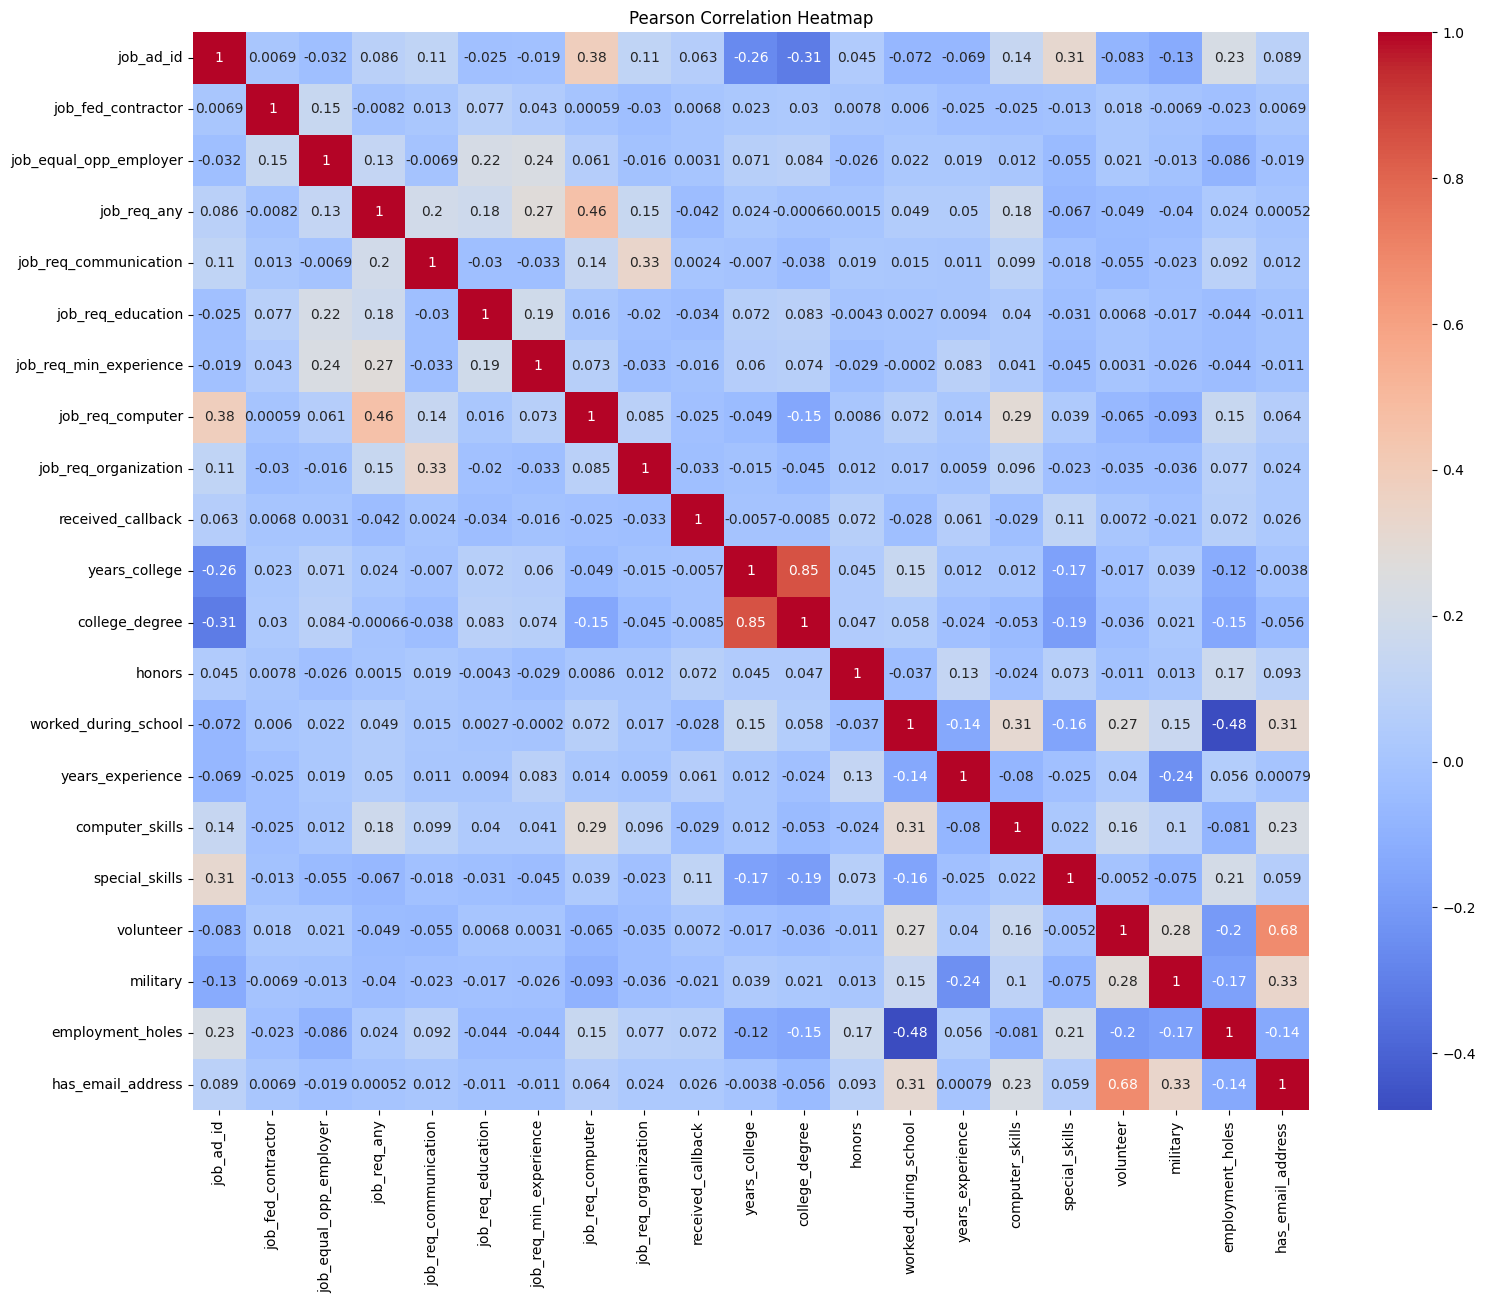

In [87]:
# Pearson Correlation
numeric_cols = df.select_dtypes(include='number')
print("Pearson's Correlation: ")
correlations = numeric_cols.corr()['received_callback'].sort_values(ascending=False)
print(correlations)

plt.figure(figsize=(18, 14))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Heatmap")
plt.show()

In [88]:
# Cramer's V Correlation
from scipy.stats import chi2_contingency

def cramers_v(col1, col2):
    confusion_matrix = pd.crosstab(col1, col2)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    score = cramers_v(df[col], df['received_callback'])
    print(f"Cramér’s V between {col} and received_callback: {round(score, 3)}")

Cramér’s V between job_city and received_callback: 0.053
Cramér’s V between job_industry and received_callback: 0.053
Cramér’s V between job_type and received_callback: 0.054
Cramér’s V between job_ownership and received_callback: 0.034
Cramér’s V between job_req_school and received_callback: 0.041
Cramér’s V between firstname and received_callback: 0.103
Cramér’s V between race and received_callback: 0.058
Cramér’s V between gender and received_callback: 0.012
Cramér’s V between resume_quality and received_callback: 0.025


In [89]:
# Spearman Correlation
spearman_corr = numeric_cols.corr(method='spearman')['received_callback'].sort_values(ascending=False)
print("Spearman Correlation:\n", spearman_corr)

Spearman Correlation:
 received_callback         1.000000
special_skills            0.111074
honors                    0.071951
employment_holes          0.071888
job_ad_id                 0.065254
years_experience          0.059082
has_email_address         0.025880
volunteer                 0.007197
job_fed_contractor        0.006798
job_equal_opp_employer    0.003092
job_req_communication     0.002421
college_degree           -0.008479
years_college            -0.008533
military                 -0.020577
job_req_min_experience   -0.021109
job_req_computer         -0.024907
worked_during_school     -0.027888
computer_skills          -0.028813
job_req_organization     -0.033416
job_req_education        -0.033864
job_req_any              -0.041699
Name: received_callback, dtype: float64


Based on data exploration, visualization, and correlation analysis, the following features were found to be the most relevant for model training: job_city, job_industry, job_type, job_ownership, job_req_any, job_req_education, job_req_min_experience, job_req_computer, job_req_organization, job_req_school, race, gender, years_college, college_degree, honors, worked_during_school, years_experience, computer_skills, special_skills, military, employment_holes. These features showed meaningful patterns, associations with the target variable, or strong predictive potential.

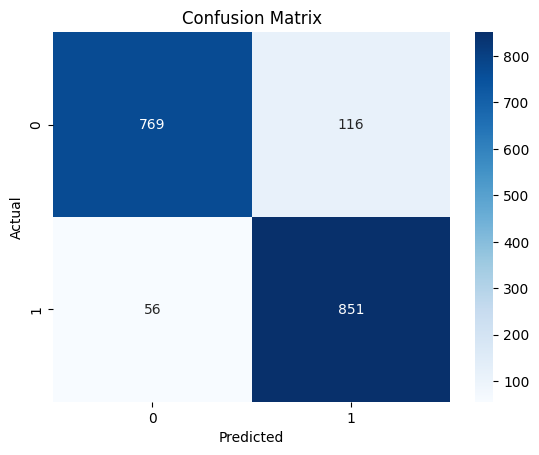


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       885
           1       0.88      0.94      0.91       907

    accuracy                           0.90      1792
   macro avg       0.91      0.90      0.90      1792
weighted avg       0.91      0.90      0.90      1792

Accuracy: 0.9040178571428571
Precision: 0.8800413650465356
Recall: 0.938257993384785
F1 Score: 0.9082177161152615
ROC AUC Score: 0.9085


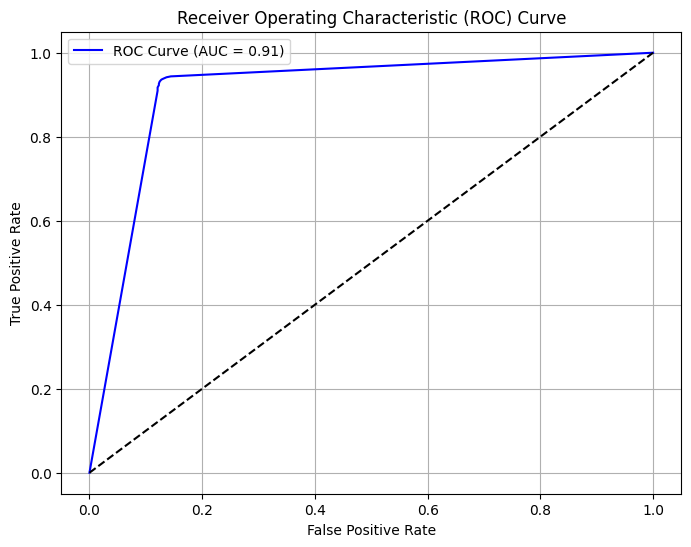

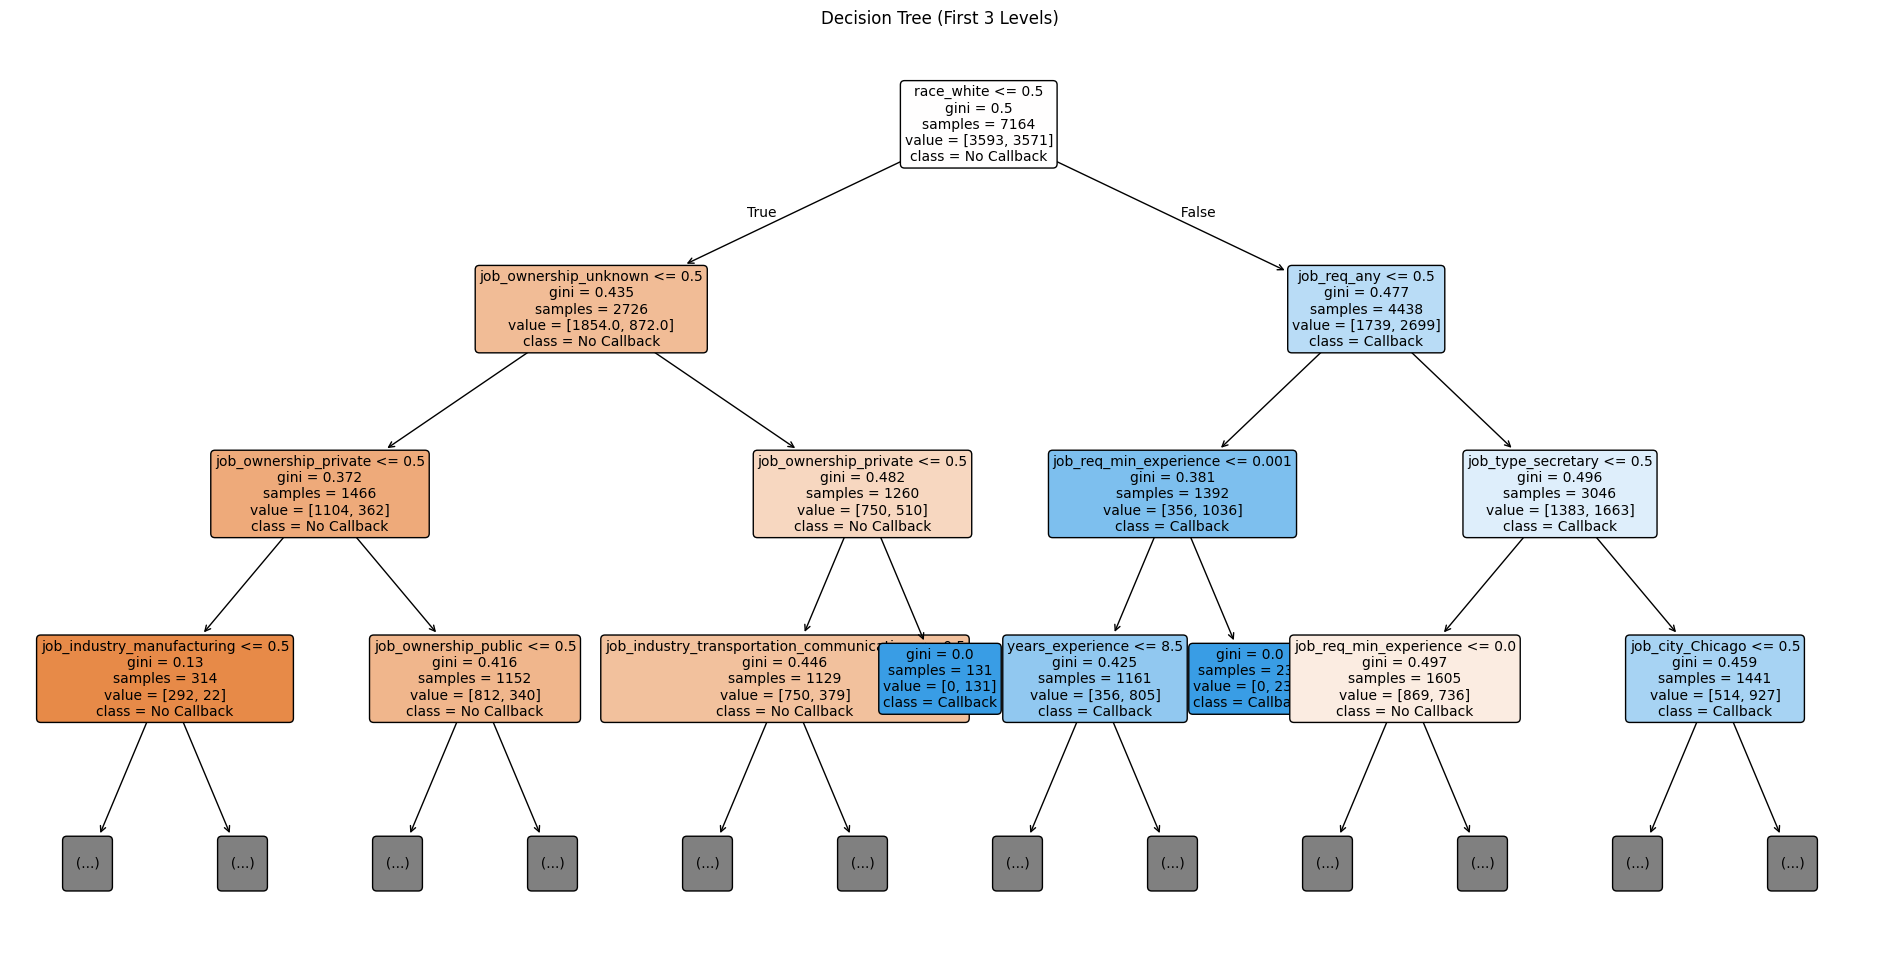

In [90]:
# Implementing Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

cols_to_keep = ['job_city', 'job_industry', 'job_type', 'job_ownership', 'job_req_any', 'job_req_education', 'job_req_min_experience',
                'job_req_computer', 'job_req_organization', 'job_req_school', 'race', 'gender', 'years_college', 'college_degree',
                'honors', 'worked_during_school', 'years_experience', 'computer_skills', 'special_skills', 'military', 'employment_holes', 'received_callback']
df_reduced = df[cols_to_keep]

# Encoding categorical variables
categorical_cols = df_reduced.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df_reduced, columns=categorical_cols, drop_first=True)

# Spliting into features (x) and target (y)
x3 = df_encoded.drop('received_callback', axis=1)
y3 = df_encoded['received_callback']

# Handling class imbalance with SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
x3_resampled, y3_resampled = smote.fit_resample(x3, y3)

# Train-test split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3_resampled, y3_resampled, test_size=0.2, random_state=42)

# Training Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x3_train, y3_train)

# Making predictions
y3_pred = clf.predict(x3_test)
y3_pred_prob = clf.predict_proba(x3_test)[:, 1]

# Evaluating the model
conf_matrix = confusion_matrix(y3_test, y3_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n", classification_report(y3_test, y3_pred))
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("Precision:", precision_score(y3_test, y3_pred))
print("Recall:", recall_score(y3_test, y3_pred))
print("F1 Score:", f1_score(y3_test, y3_pred))

print(f"ROC AUC Score: {roc_auc_score(y3_test, y3_pred_prob):.4f}")

# Ploting ROC Curve
fpr, tpr, _ = roc_curve(y3_test, y3_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y3_test, y3_pred_prob):.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()

# Ploting the Decision Tree diagram
plt.figure(figsize=(24, 12))
plot_tree(clf,
          feature_names=x3.columns,
          class_names=["No Callback", "Callback"],
          filled=True,
          max_depth=3,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree (First 3 Levels)")
plt.show()


In [91]:
features4 = [
 'college_degree',
    'honors',
    'worked_during_school',

    'computer_skills',
    'special_skills',
    'volunteer',
    'military',
    'employment_holes'
]


In [92]:
df4 = df.copy()
df_encoded4 = pd.get_dummies(df4[features4], drop_first=True)


In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X4_scaled = scaler.fit_transform(df_encoded4)

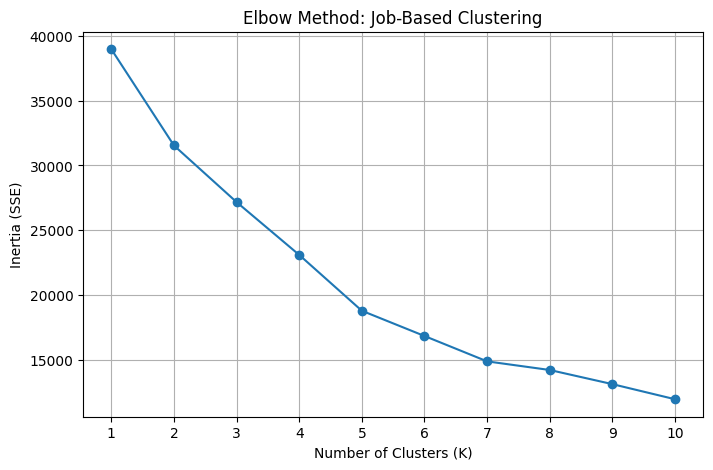

In [94]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

K_range = range(1,11)  # K = 2 to 20 (inclusive of 2, exclusive of 21)

inertia = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X4_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method: Job-Based Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.xticks(K_range)
plt.grid(True)
plt.show()



In [95]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10, max_iter=300)
df4['job_cluster'] = kmeans.fit_predict(X4_scaled)



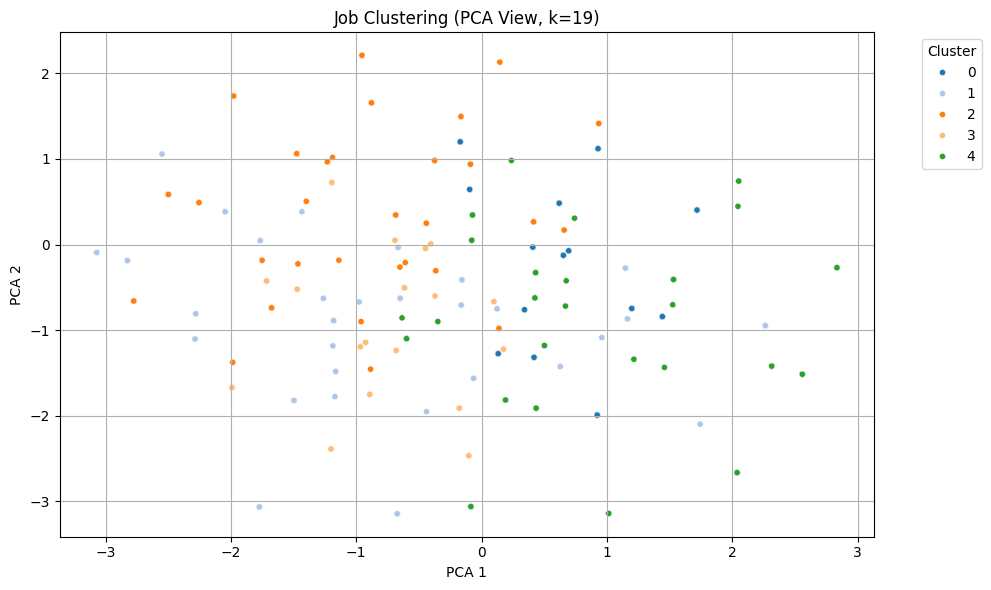

In [96]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X4_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df4['job_cluster'], palette='tab20', s=20)
plt.title('Job Clustering (PCA View, k=19)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


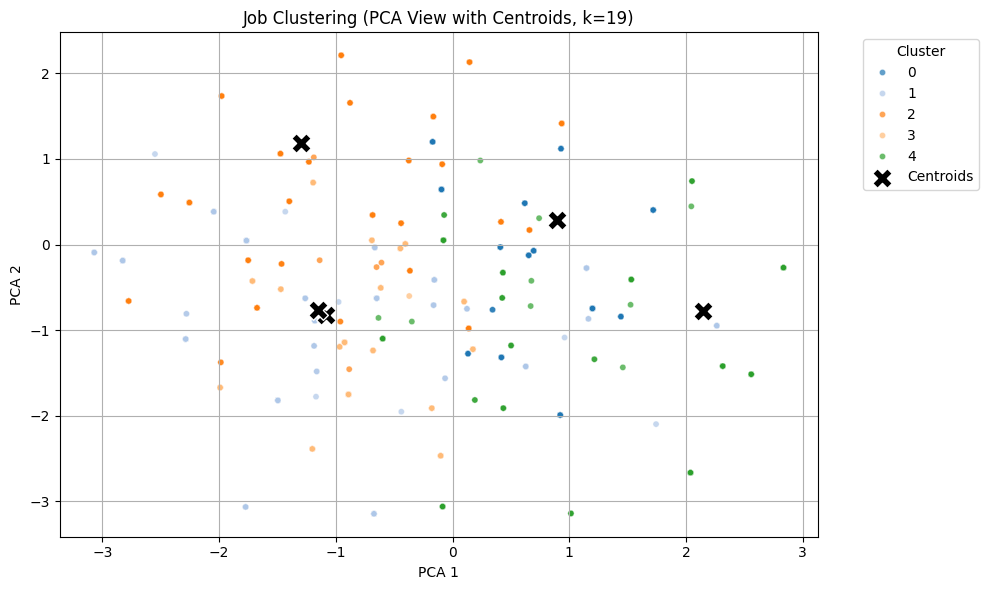

In [97]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X4_scaled)

# Transform centroids to PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df4['job_cluster'], palette='tab20', s=20, alpha=0.7)

# Plot centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='X', s=200, c='black', label='Centroids', edgecolor='white')

plt.title('Job Clustering (PCA View with Centroids, k=19)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Here the target is years_experinece <br>
Features are selected on the basis of correlation matrix

In [99]:
target5 = 'years_experience'

# Select relevant features (remove names, IDs, and potentially target-leaky or redundant ones)
features5 = [
    'job_type', 'job_industry', 'job_ownership', 'job_fed_contractor',
    'job_equal_opp_employer', 'job_req_any', 'job_req_communication',
    'job_req_education', 'job_req_computer', 'job_req_organization',
    'college_degree', 'honors', 'worked_during_school', 'volunteer',
    'military', 'employment_holes', 'has_email_address',
    'resume_quality'  # Categorical, will be one-hot encoded
]

In [100]:
X5 = df[features5]
y5 = df[target5]

#  Identify column types
categorical = X5.select_dtypes(include=['object']).columns.tolist()
numerical = X5.select_dtypes(include=['int64', 'float64']).columns.tolist()

#  Preprocessing Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

#  Build and Train Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split into train/test
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X5_train, y5_train)

#  Predict and Evaluate
y5_pred = pipeline.predict(X5_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y5_test, y5_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y5_test, y5_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y5_test, y5_pred)))
print("R-squared (R²):", r2_score(y5_test, y5_pred))

Mean Absolute Error (MAE): 3.1735773471943123
Mean Squared Error (MSE): 20.360537977152262
Root Mean Squared Error (RMSE): 4.512265282222695
R-squared (R²): 0.16905040796184356


As per the analysis this data is no linear , and the accuracy comes ot to be 16% .

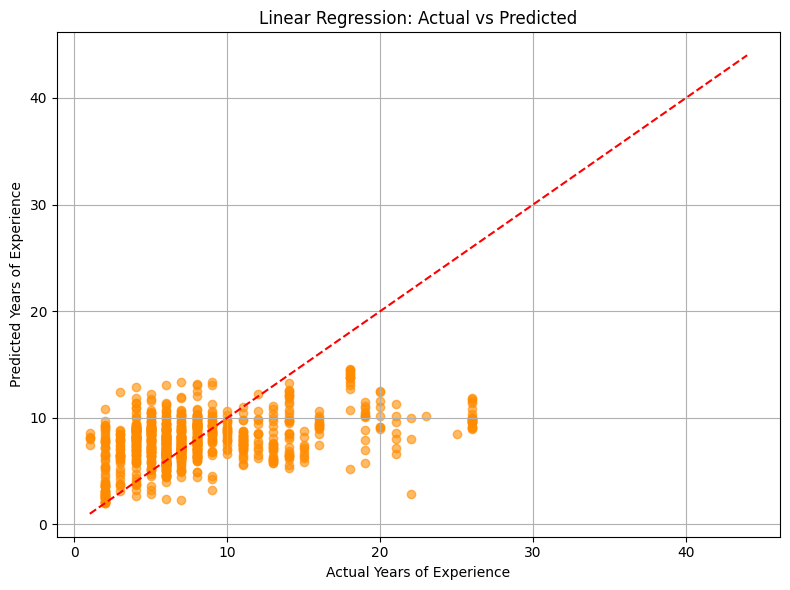

In [101]:
#Analysis
plt.figure(figsize=(8, 6))
plt.scatter(y5_test, y5_pred, alpha=0.6, color='darkorange')
plt.xlabel("Actual Years of Experience")
plt.ylabel("Predicted Years of Experience")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y5.min(), y5.max()], [y5.min(), y5.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()

## Predicting Resume Quality for New User Input

In [102]:
# Defining a function to label the prediction
def label_resume_quality(category):
    if category == 0:
        return "Low Quality Resume"
    elif category == 1:
        return "High Quality Resume"
    else:
        return "Unknown"

In [103]:
# Creating a new DataFrame for user input
user_input = pd.DataFrame()

# Taking input from user
user_input['has_email_address'] = [int(input("Has Email Address (0 = No, 1 = Yes): "))]
user_input['volunteer'] = [int(input("Volunteered (0 = No, 1 = Yes): "))]
user_input['worked_during_school'] = [int(input("Worked During School (0 = No, 1 = Yes): "))]
user_input['military'] = [int(input("Military Experience (0 = No, 1 = Yes): "))]
user_input['years_experience'] = [float(input("Years of Experience: "))]



# Scaling user input using the previously fitted scaler
user_input_scaled = scaler1.transform(user_input)

# Predicting resume quality
prediction = KNN.predict(user_input_scaled)[0]

# Printing result
print("\nPredicted Resume Quality (0 = Low, 1 = High):", prediction)
print("This means:", label_resume_quality(prediction))


Predicted Resume Quality (0 = Low, 1 = High): 1
This means: High Quality Resume


In [104]:
clf2 = DecisionTreeClassifier(random_state=42)
clf2.fit(x3_train, y3_train)

print("Please enter the following information: \n")

test = pd.DataFrame({
    'job_city': [input('Enter the city where the job is located (Boston/Chicago): ')],
    'job_industry': [input('Enter the industry of the job (manufacturing/wholesale_and_retail_trade/business_and_personal_service/finance_insurance_real_estate/transportation_communication/other_service): ')],
    'job_type': [input('Enter the job role (supervisor/secretary/sales_rep/retail_sales/manager/clerical): ')],
    'job_ownership': [input("Enter the job ownership (nonprofit/public/private/unknown): ")],
    'job_req_any': [int(input("Are any job requirements listed? (Enter 1 for yes and 0 for no): "))],
    'job_req_education': [int(input('Are there any educational requirements? (Enter 1 for yes and 0 for no): '))],
    'job_req_min_experience': [float(input('Enter the amount of experience required: '))],
    'job_req_computer': [int(input('Are comuter skills required? (Enter 1 for yes and 0 for no): '))],
    'job_req_organization': [int(input('Are organisation skills required? (Enter 1 for yes and 0 for no): '))],
    'job_req_school': [input('Enter the level of education required (high_school_grad/some_college/college/non_listed): ')],
    'race': [input('Enter your race (white/black): ')],
    'gender': [input('Enter your gender (f for female, m for male): ')],
    'years_college': [int(input('Enter your number of college years (0 to 4): '))],
    'college_degree': [int(input('Do you have a college degree? (Enter 1 for yes and 0 for no): '))],
    'honors': [int(input('Do you have an honors? (Enter 1 for yes and 0 for no): '))],
    'worked_during_school': [int(input('Did you work dring your school years? (Enter 1 for yes and 0 for no): '))],
    'years_experience': [int(input('How many years of work experience do you have? : '))],
    'computer_skills': [int(input('Do you have any computer skills? (Enter 1 for yes and 0 for no): '))],
    'special_skills': [int(input('Do you have any special skills? (Enter 1 for yes and 0 for no): '))],
    'military': [int(input('Do you have any military experience? (Enter 1 for yes and 0 for no): '))],
    'employment_holes': [int(input('Do you have any employment holes? (Enter 1 for yes and 0 for no): '))]
})

test_encoded = pd.get_dummies(test)
test_encoded = test_encoded.reindex(columns=x3.columns, fill_value=0)
prediction = clf2.predict(test_encoded)

result = "Yes" if prediction[0] == 1 else "No"

print("\nCallback Received: ", result)


Please enter the following information: 


Callback Received:  No


In [105]:
user_input2 = pd.DataFrame()
user_input2['years_experience'] = [float(input("Years of Experience: "))]
user_input2['computer_skills'] = [int(input("Has Computer Skills (0 = No, 1 = Yes): "))]
user_input2['college_degree'] = [int(input("Has College Degree (0 = No, 1 = Yes): "))]
user_input2['employment_holes'] = [int(input("Employment Gaps (0 = No, 1 = Yes): "))]
user_input2['worked_during_school'] = [int(input("Worked During School (0 = No, 1 = Yes): "))]

user_input2_scaled = scaler2.transform(user_input2)
prediction = model2.predict(user_input2_scaled)[0]

if prediction == 1:
    print("\nPrediction: YES — You are likely to receive a callback.")
else:
    print("\nPrediction: NO — You are unlikely to receive a callback.")




Prediction: NO — You are unlikely to receive a callback.


In [106]:
import joblib

# Save models
joblib.dump(KNN, "knn_model.pkl")
joblib.dump(clf2, "tree_model.pkl")
joblib.dump(model2, "logistic_model.pkl")

# Save scalers
joblib.dump(scaler1, "scaler_knn.pkl")
joblib.dump(scaler2, "scaler_logistic.pkl")

# Save reference columns for clf2 preprocessing
joblib.dump(x3.columns.tolist(), "tree_features.pkl")

['tree_features.pkl']